# Task 1

## Create a bar chat or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or gender in a population .
Dataset:-  https://data.worldbank.org/indicator/SP.POP.TOTL


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Load dataset

In [2]:
dataframe = pd.read_csv(r'C:/Users/HP/Desktop/task1.csv')

In [3]:
dataframe.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


In [4]:
dataframe.tail(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0
265,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3806310.0,3925952.0,4049778.0,4177931.0,4310332.0,4447149.0,...,13555422.0,13855753.0,14154937.0,14452704.0,14751101.0,15052184.0,15354608.0,15669666.0,15993524.0,16320537.0


# Clean missing values 

In [5]:
dataframe.fillna(method="ffill", inplace=True)

# Remove unnecessary columns

In [6]:
dataframe.drop(['Indicator Name', 'Indicator Code', 'Country Code'], axis=1, inplace=True)

# Visualize distribution over years

In [7]:
years = dataframe.columns[1:]
total_values = dataframe[years].sum()

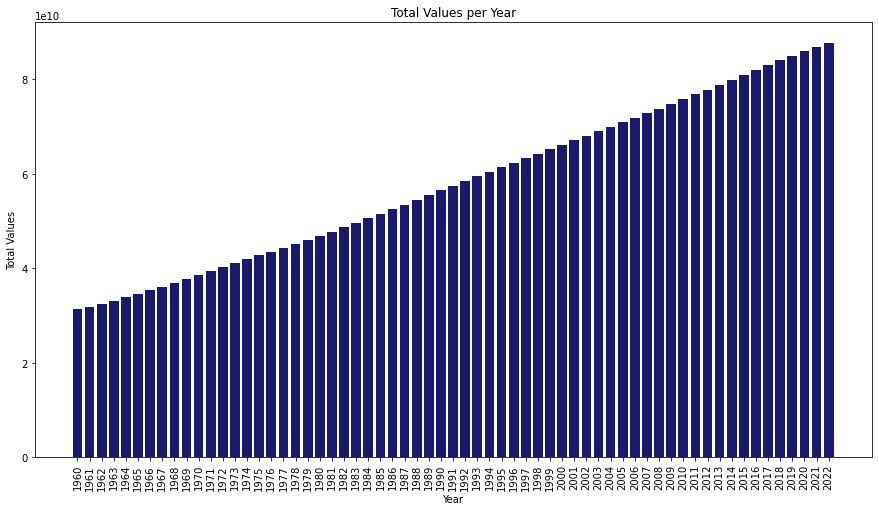

In [8]:
plt.figure(figsize=(15, 8))
plt.bar(years, total_values, color='#191970')
plt.xlabel('Year')
plt.ylabel('Total Values')
plt.title('Total Values per Year')
plt.xticks(rotation=90)
plt.show()

# Visualize top 20 countries by 1960 and 2022

In [9]:
country_by_1960 = dataframe.sort_values(by='1960').head(20)
country_by_2022 = dataframe.sort_values(by='2022').head(20)

In [10]:
def plot_country_data(dataframe):
    for country_name, data_values in dataframe.set_index('Country Name').T.iterrows():
        plt.figure(figsize=(10, 5))
        sns.barplot(x=data_values.index, y=data_values.values)
        plt.xlabel('Year')
        plt.ylabel('Data Value')
        plt.title(f"{country_name} - Data Values from 1960 to 2022")
        plt.xticks(rotation=90)
        plt.show()

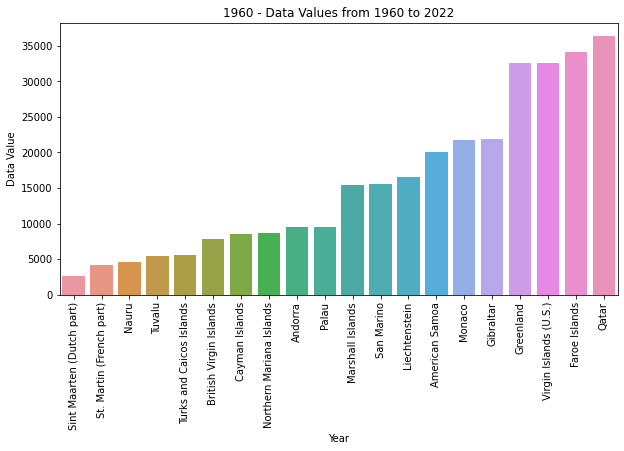

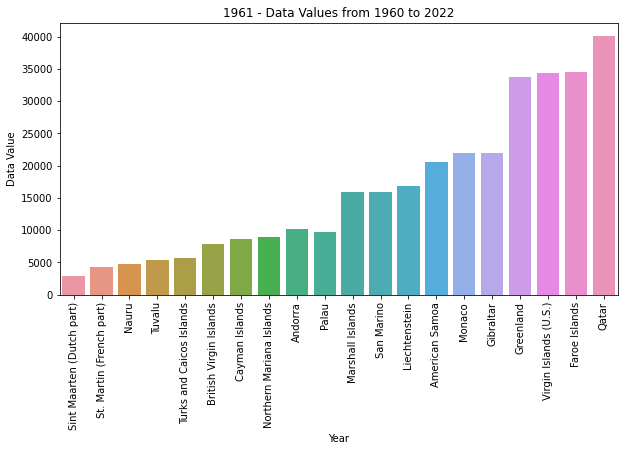

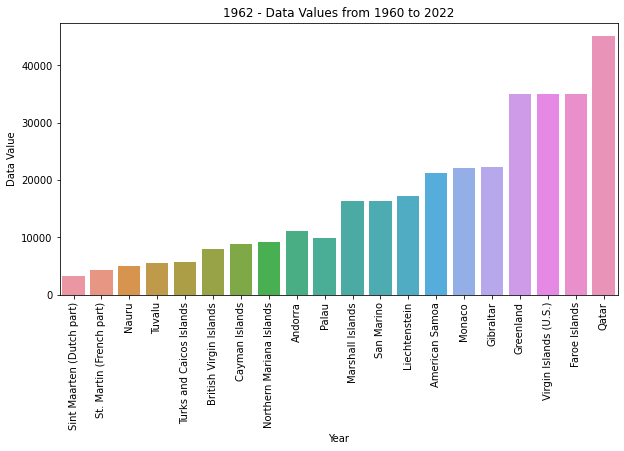

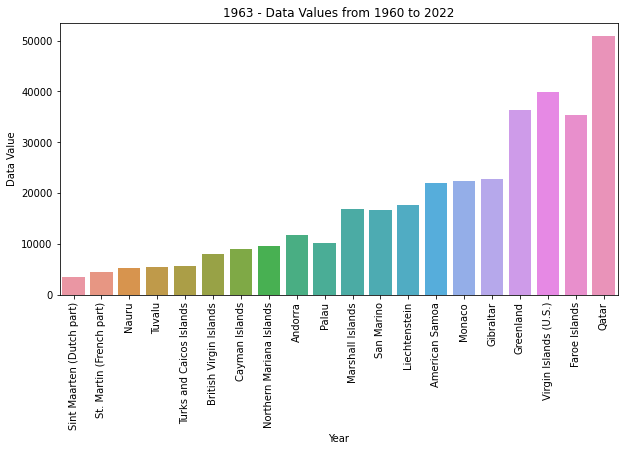

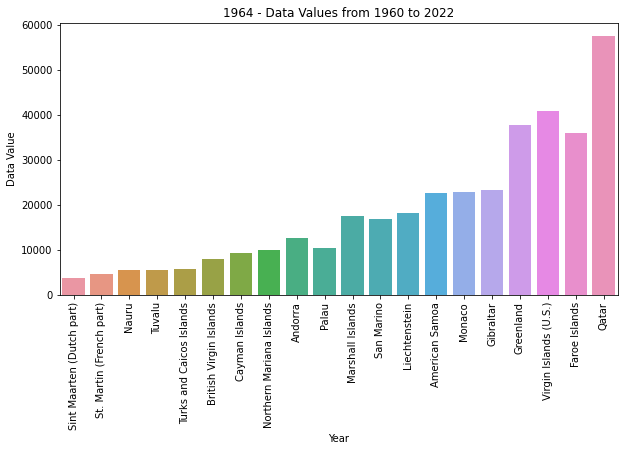

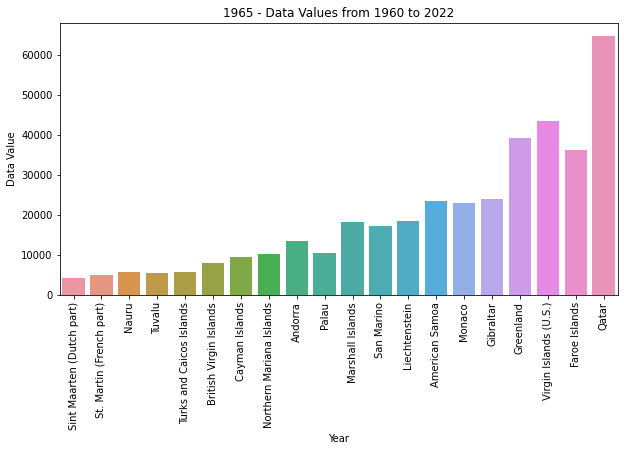

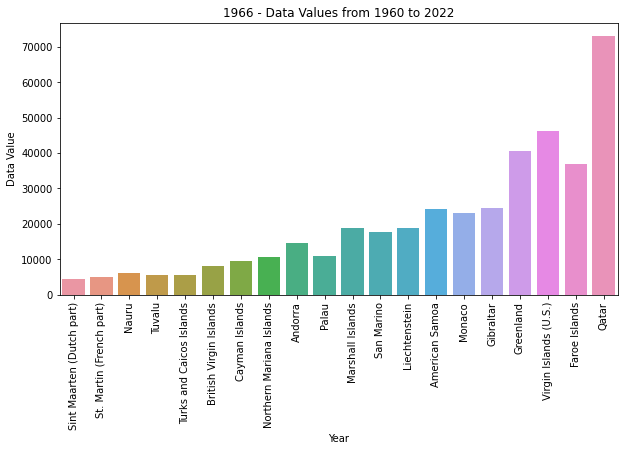

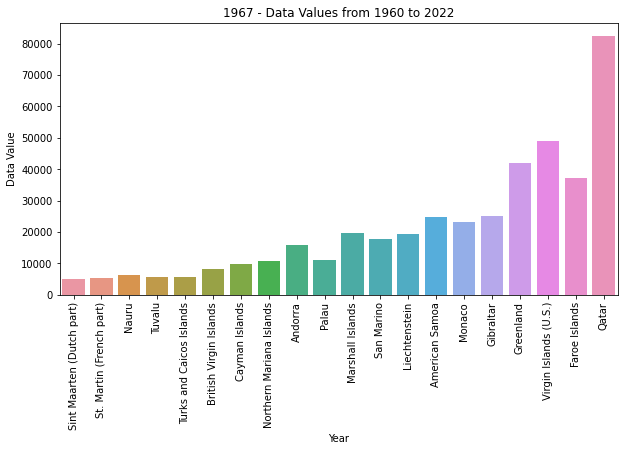

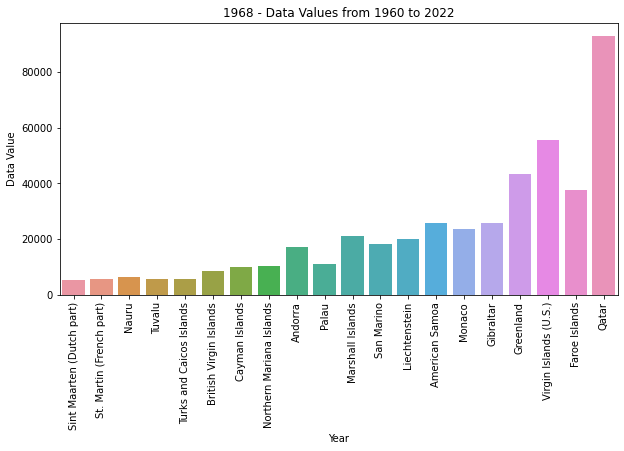

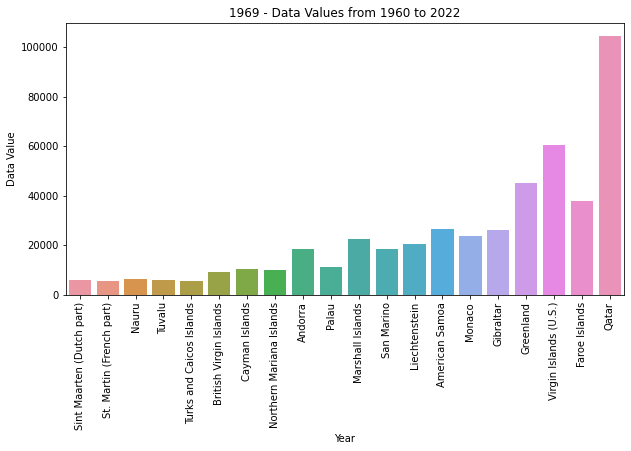

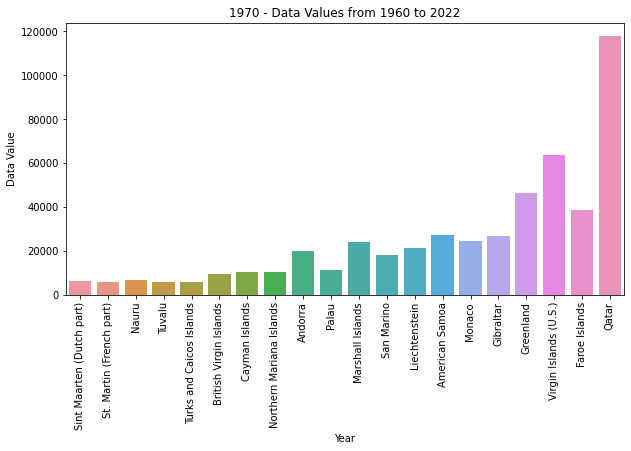

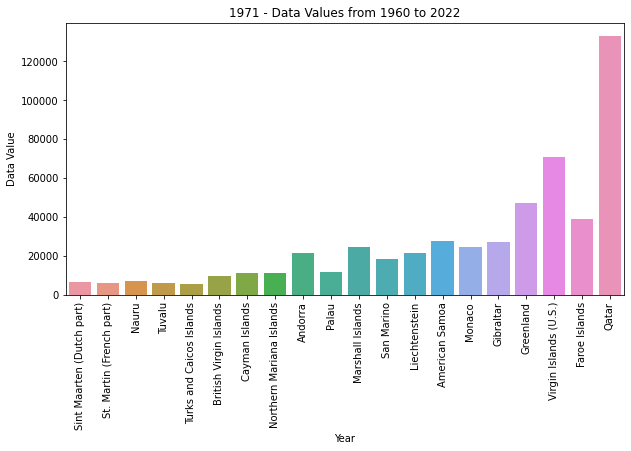

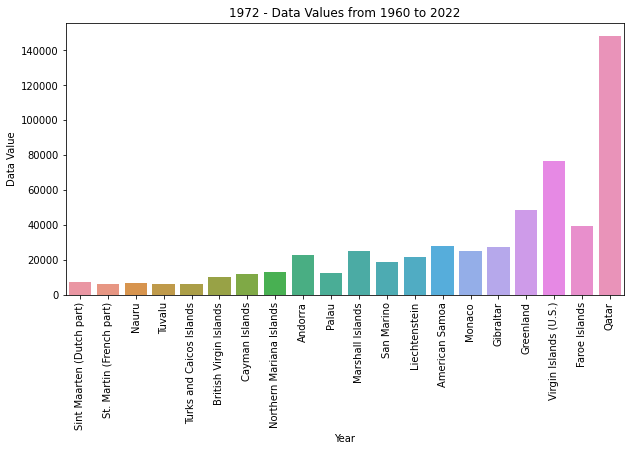

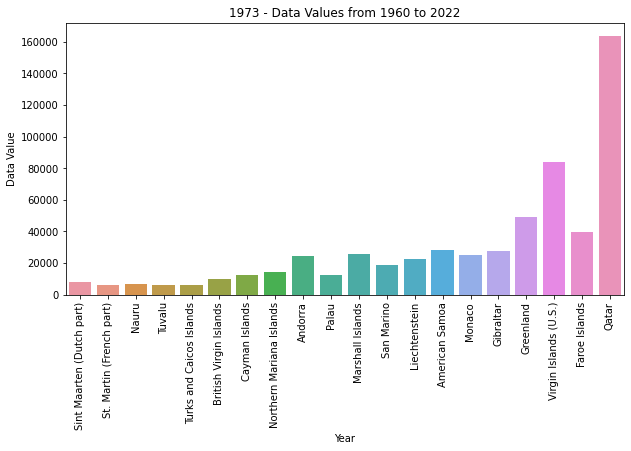

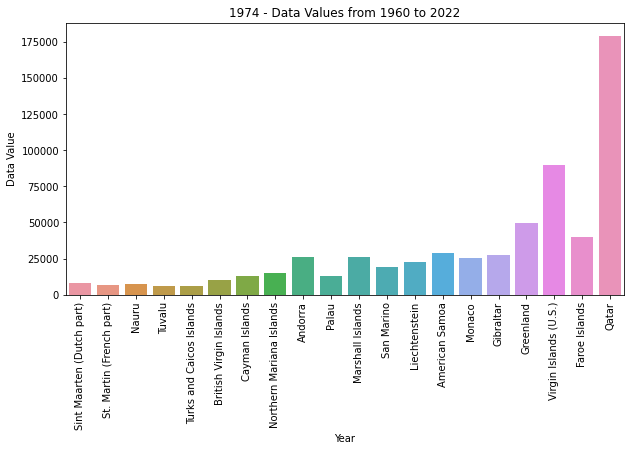

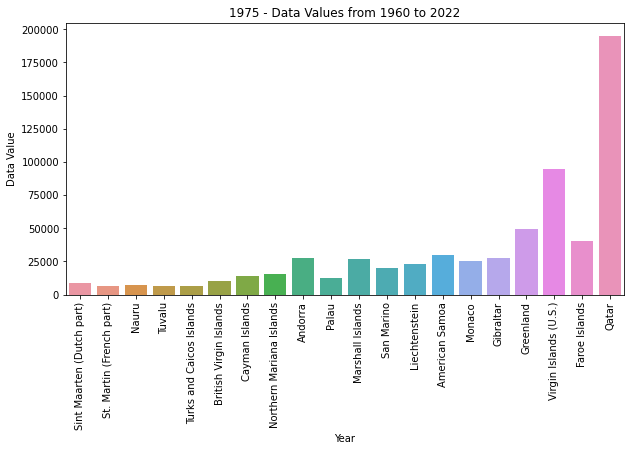

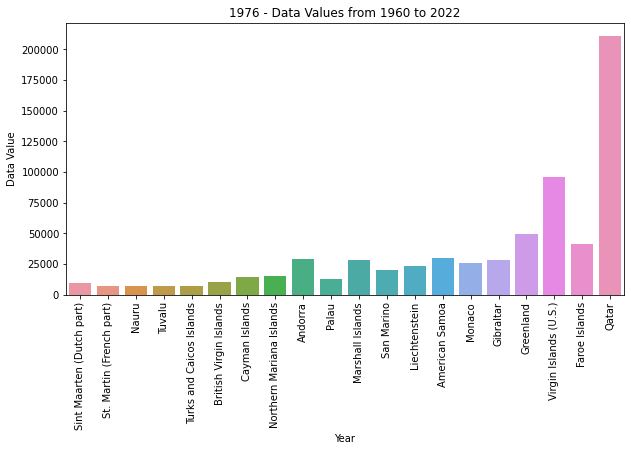

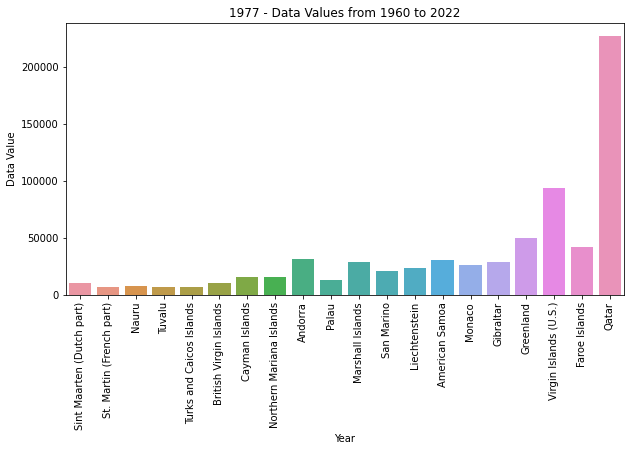

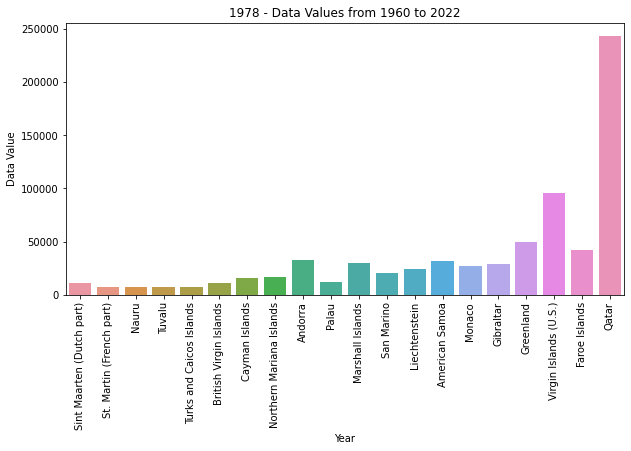

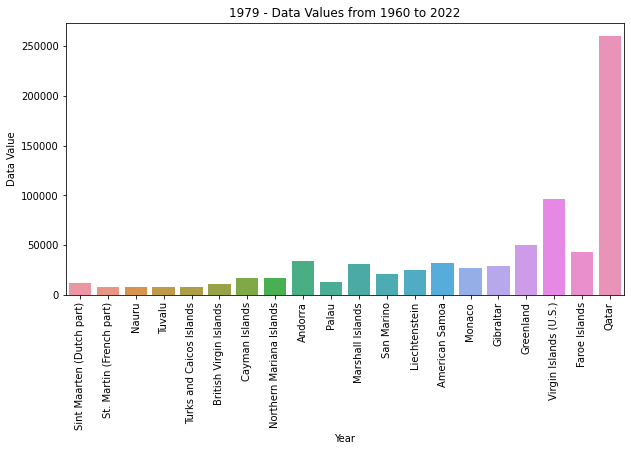

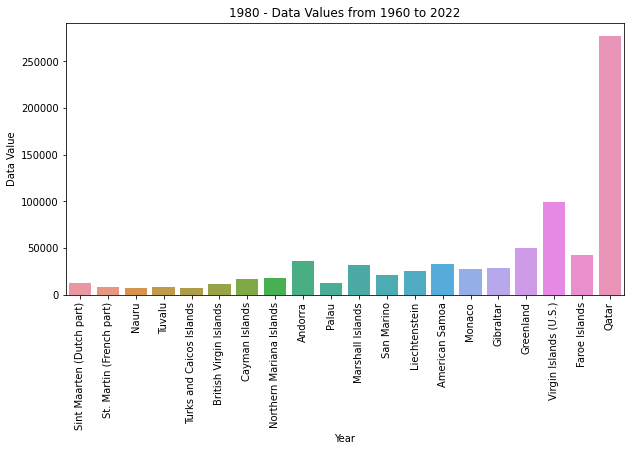

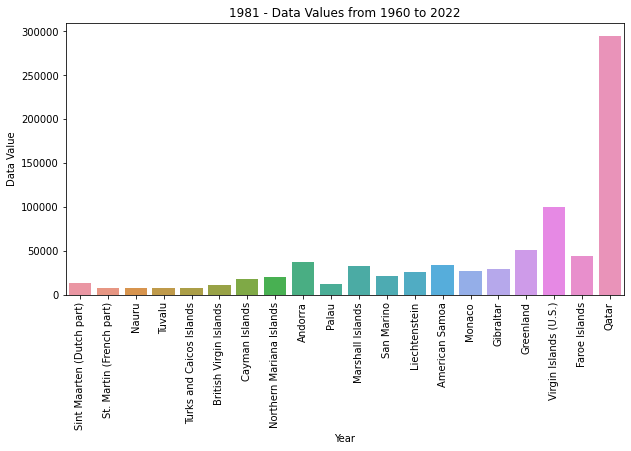

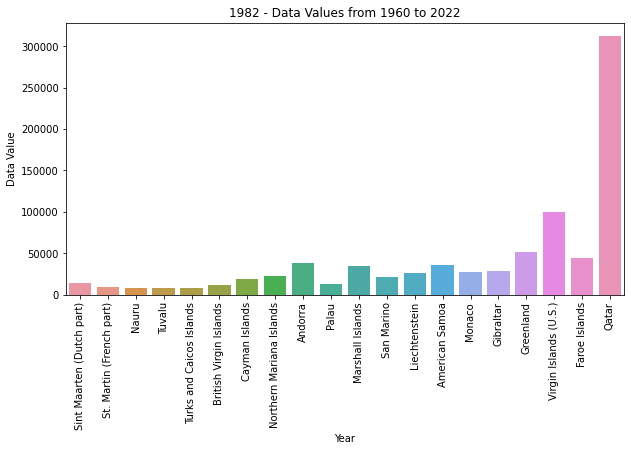

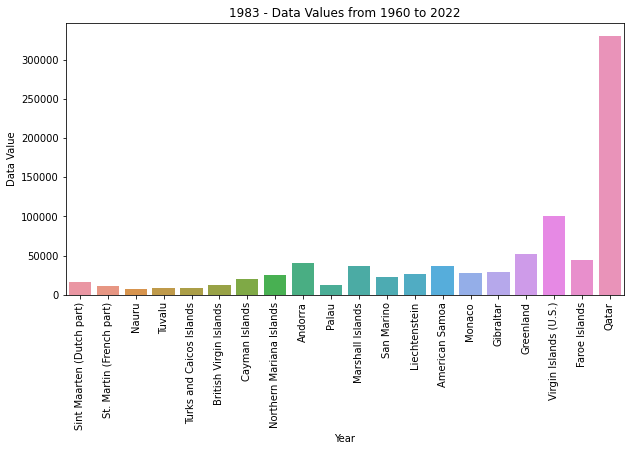

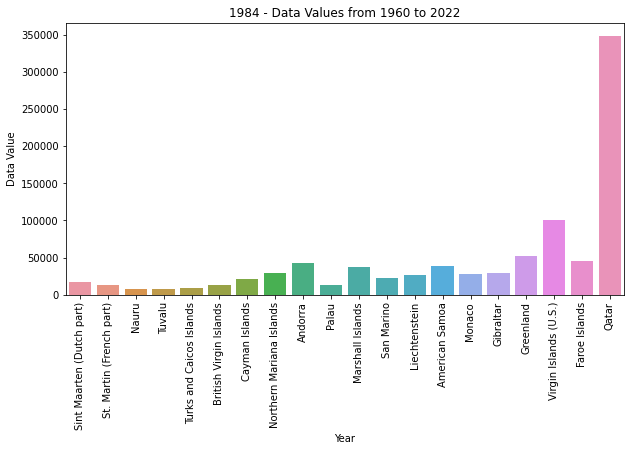

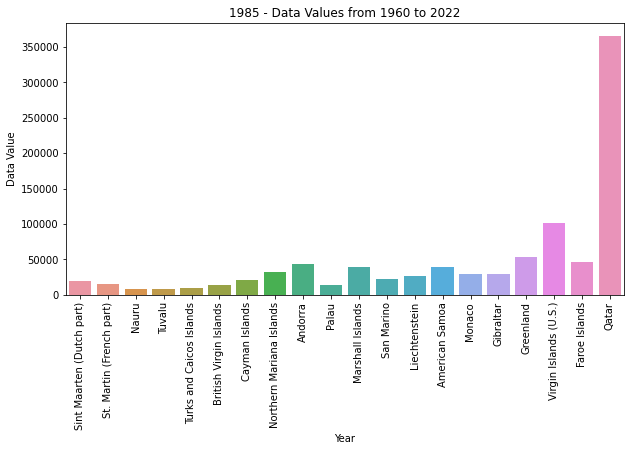

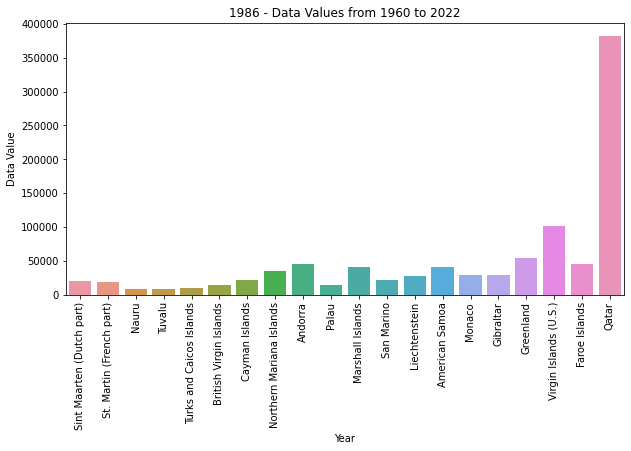

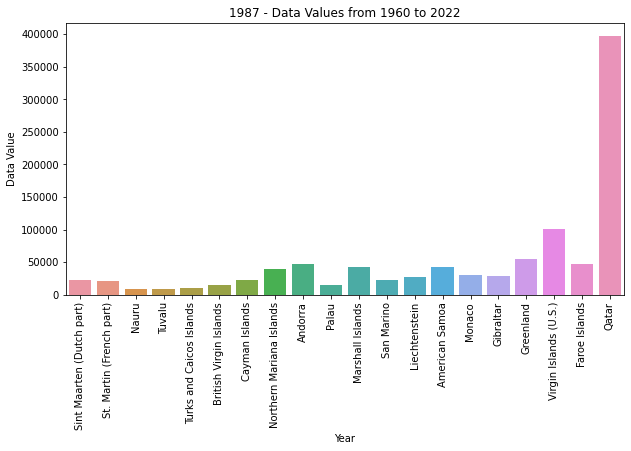

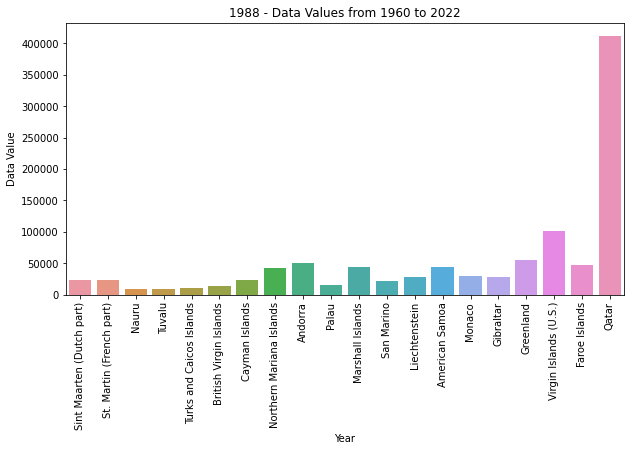

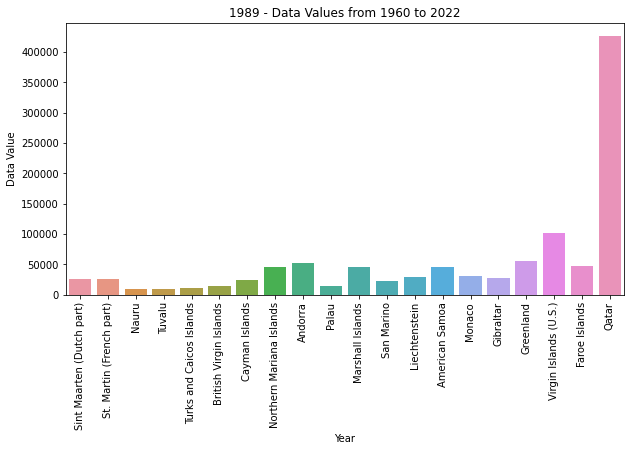

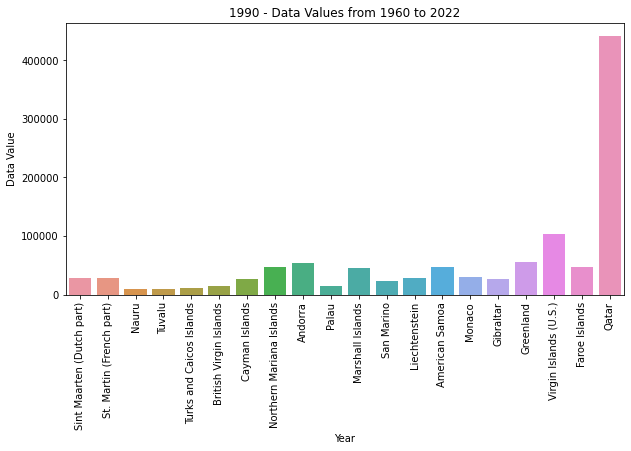

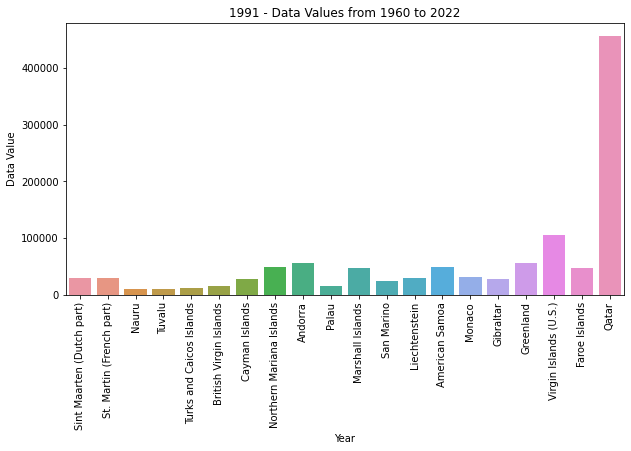

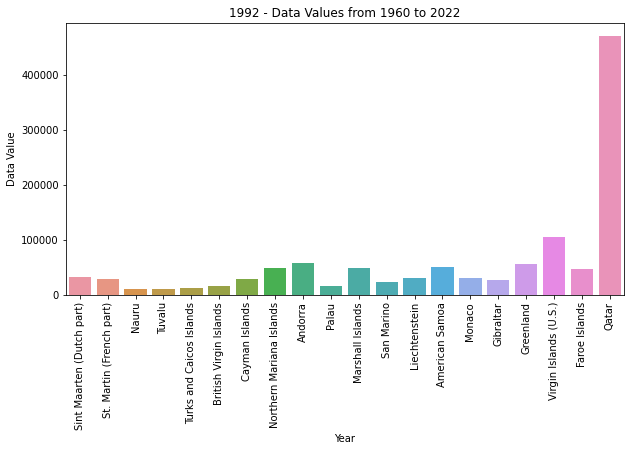

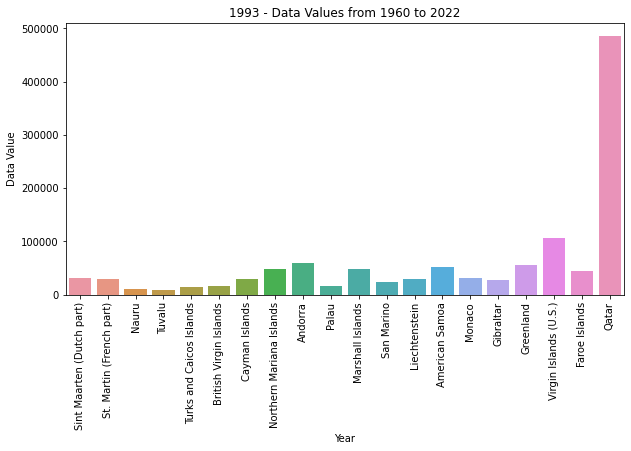

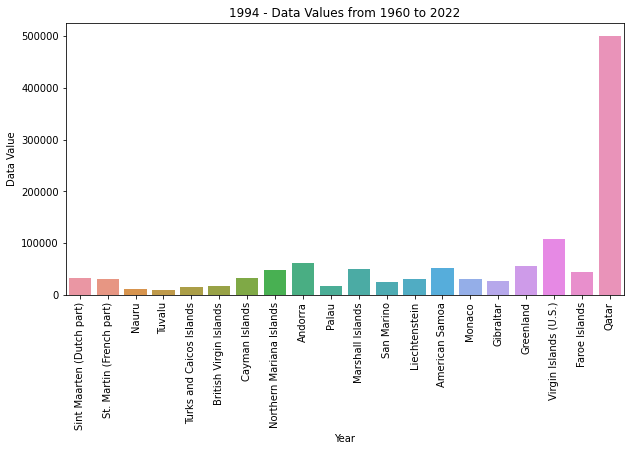

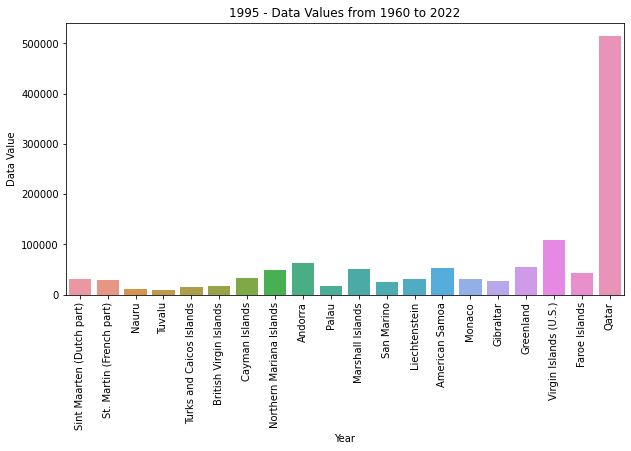

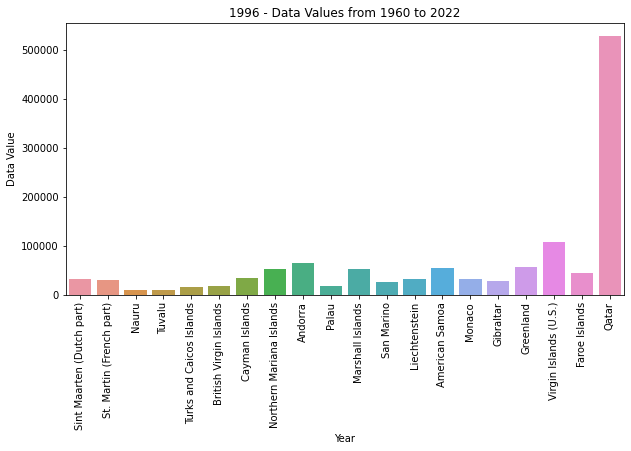

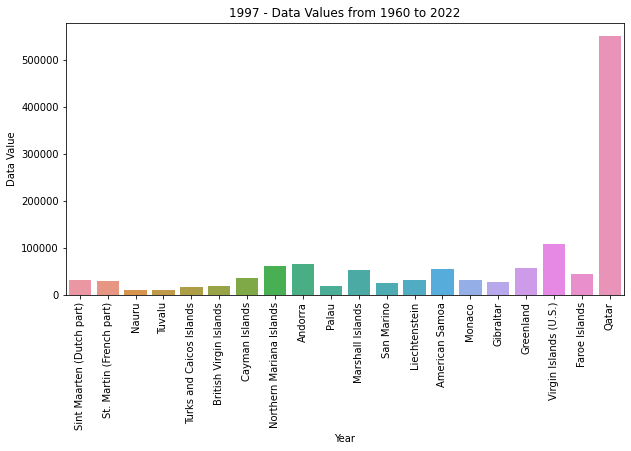

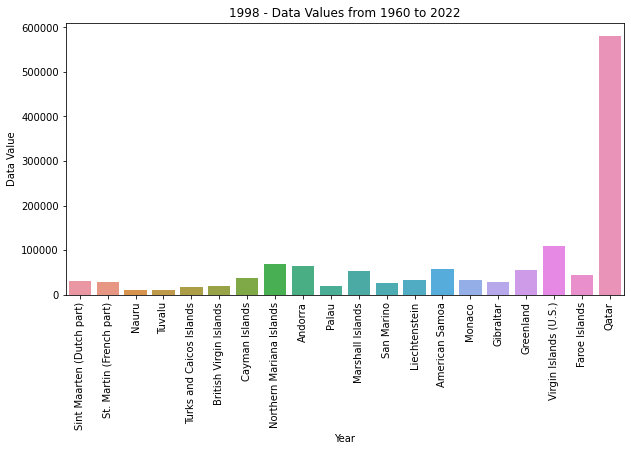

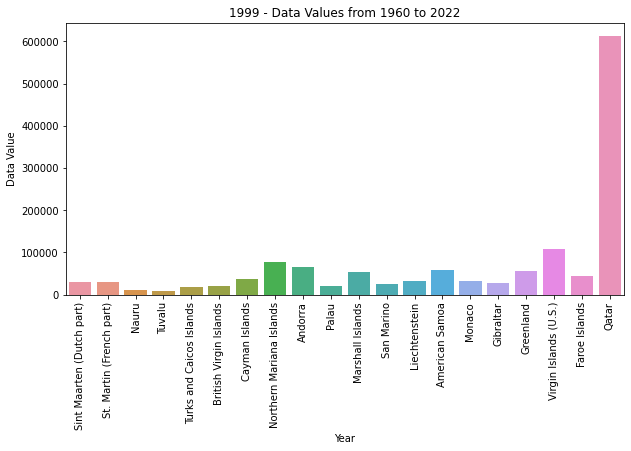

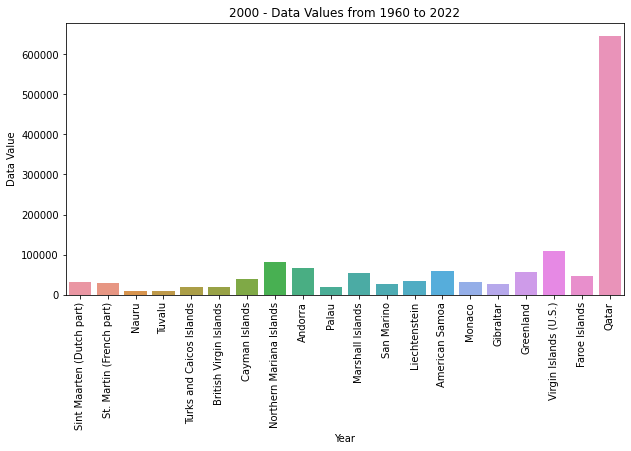

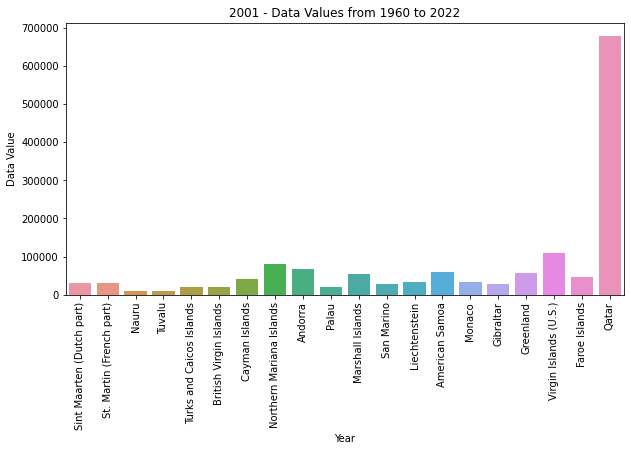

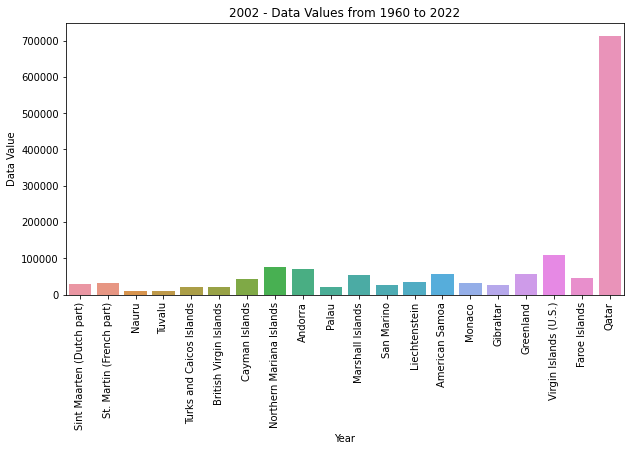

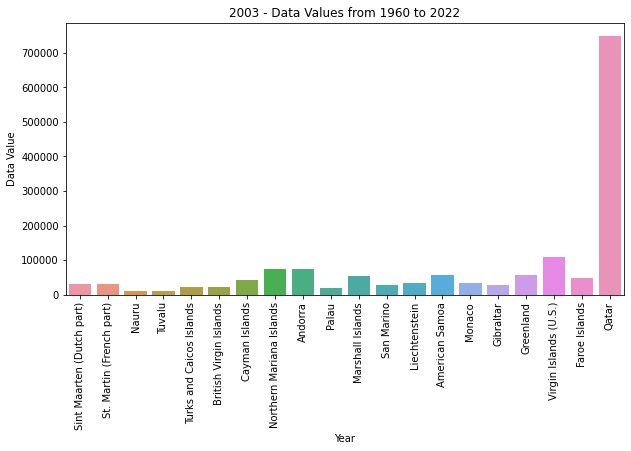

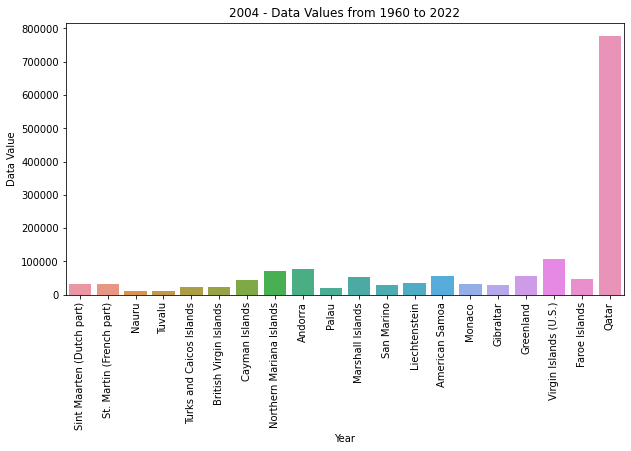

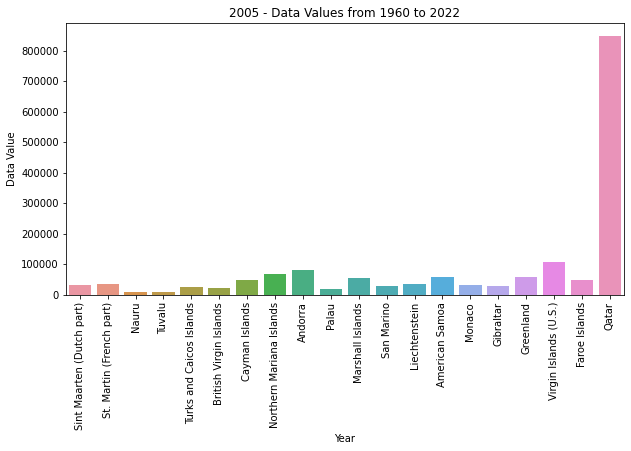

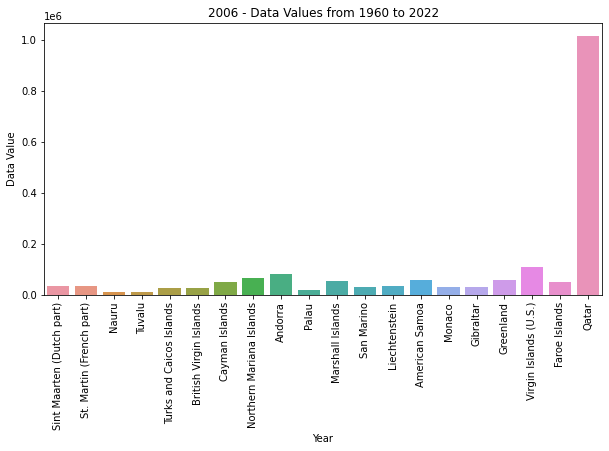

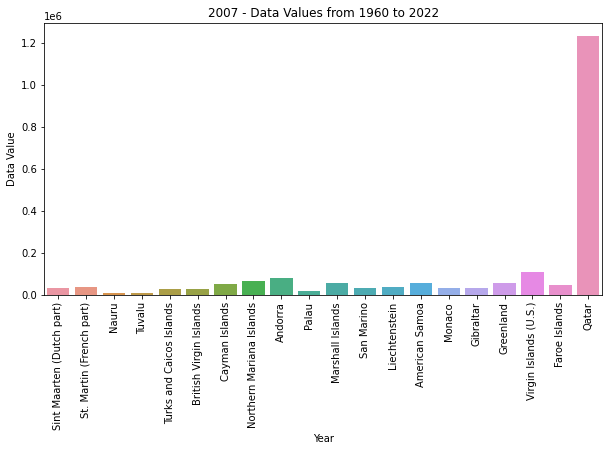

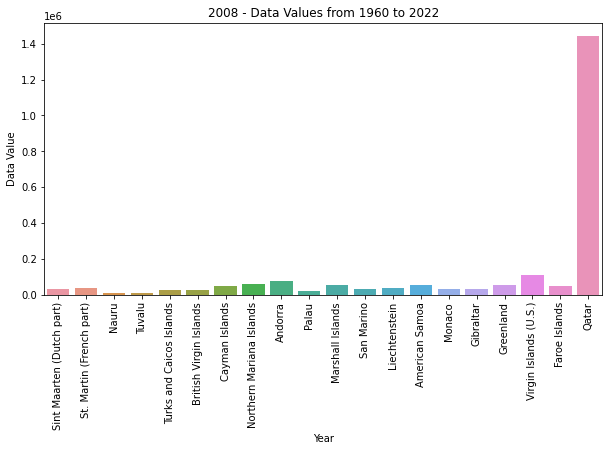

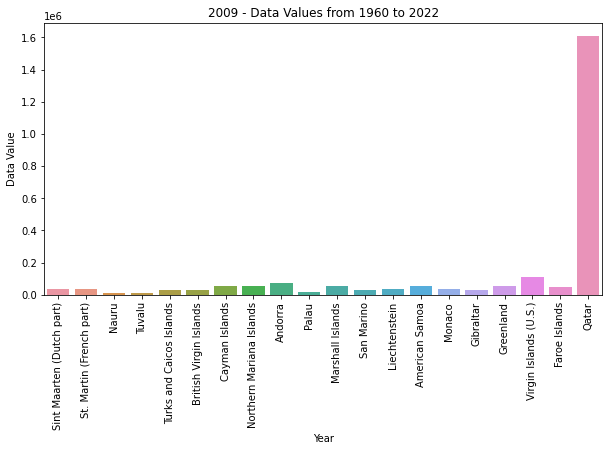

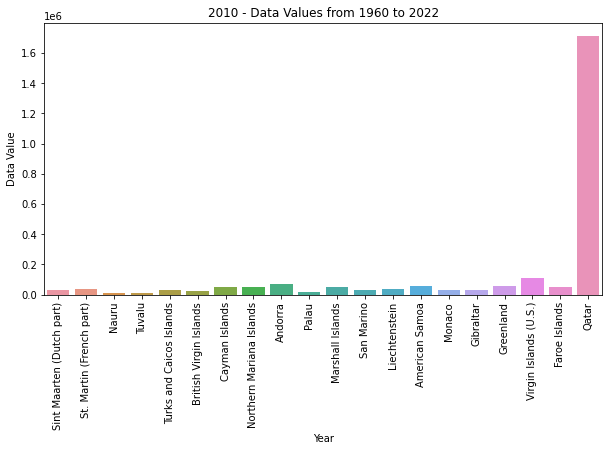

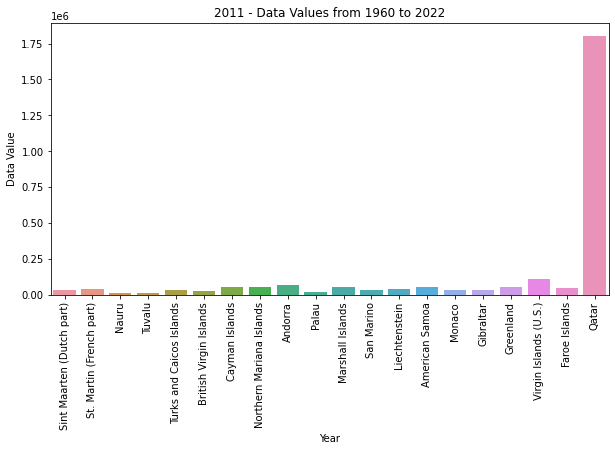

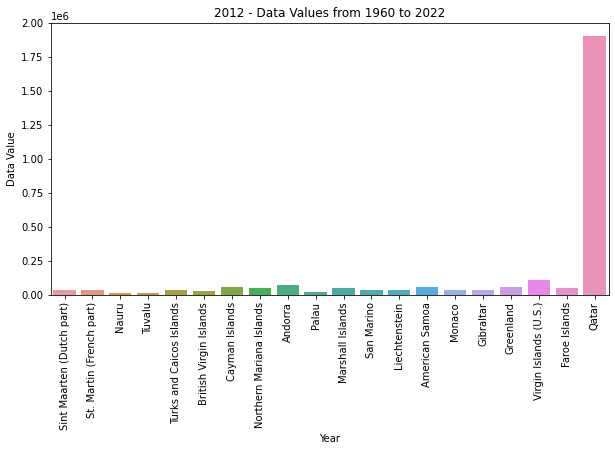

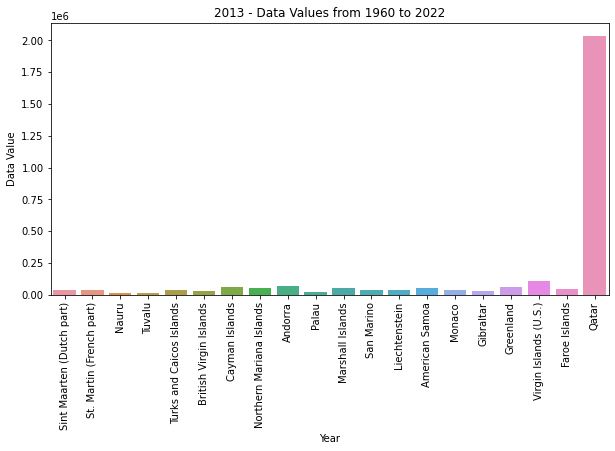

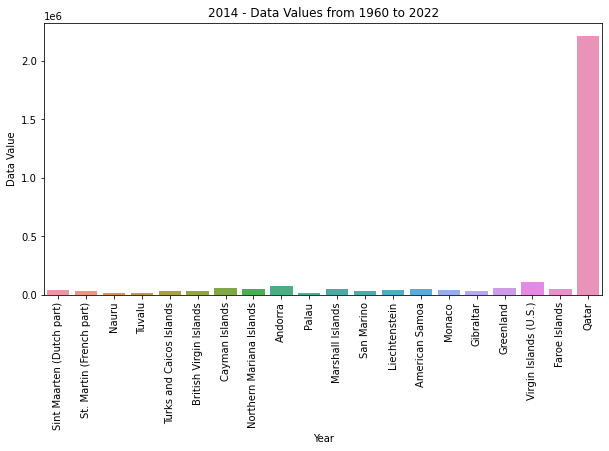

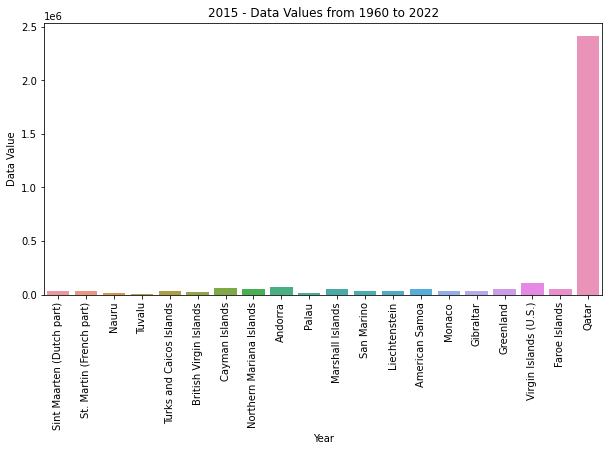

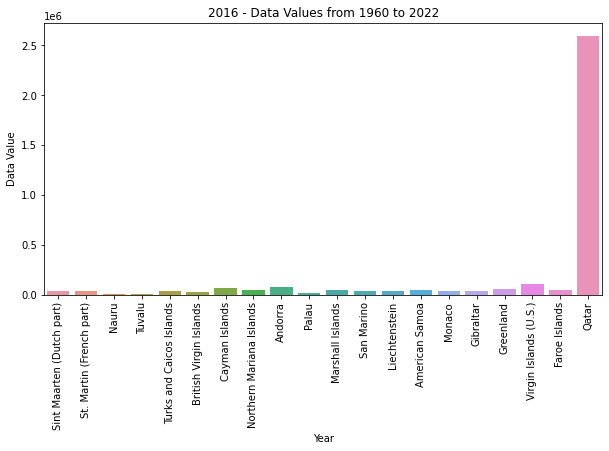

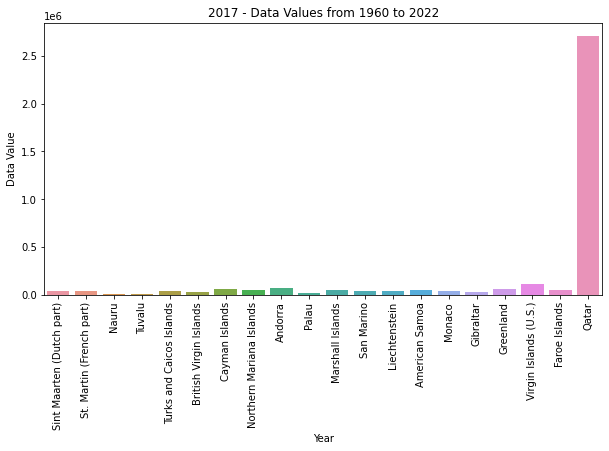

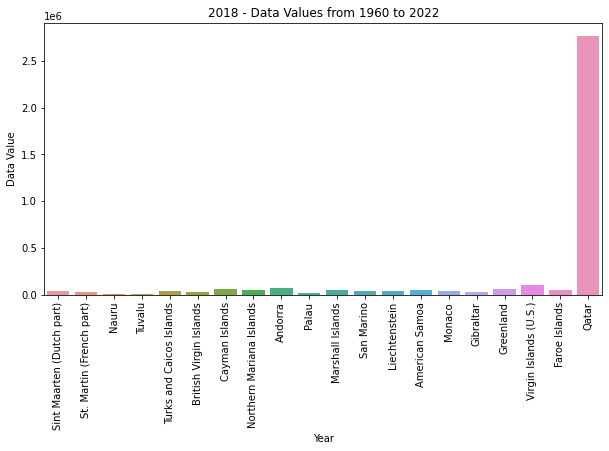

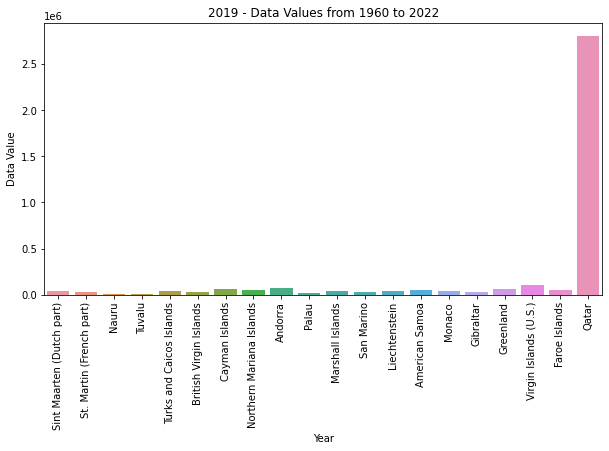

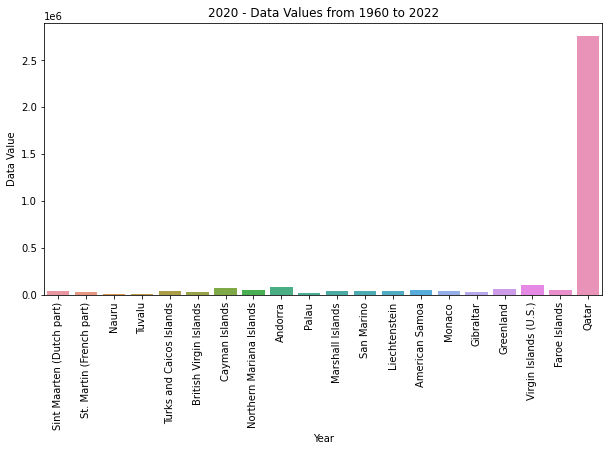

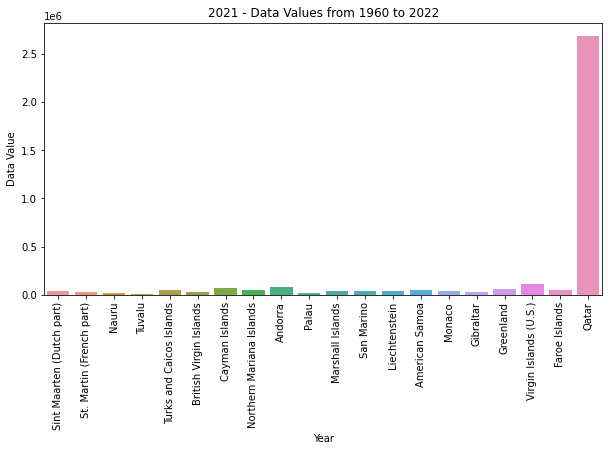

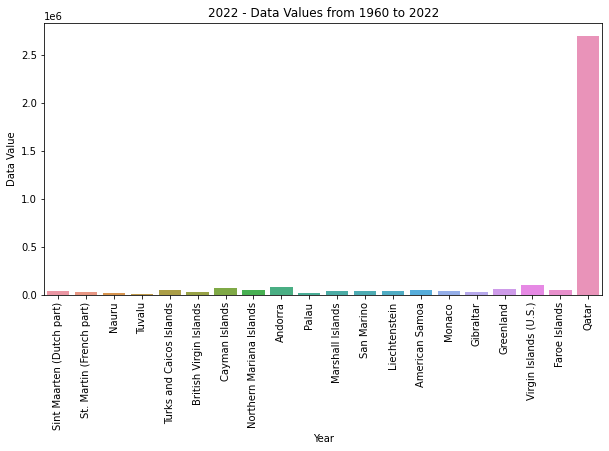

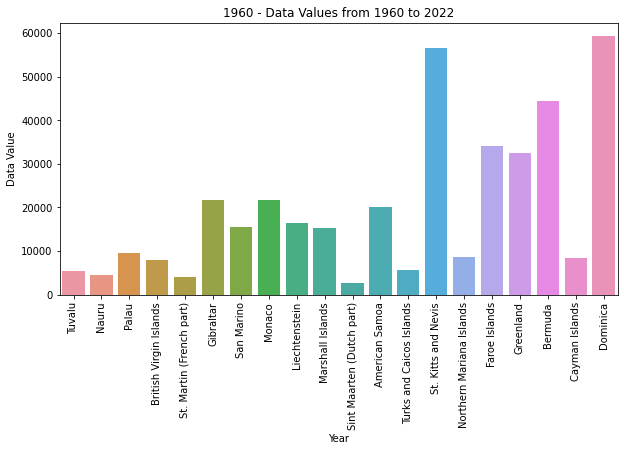

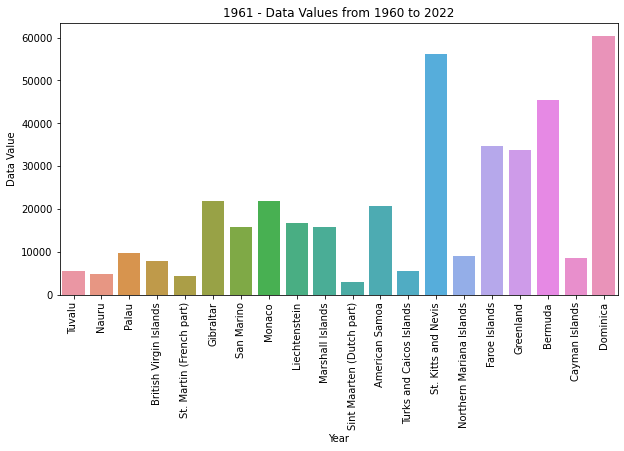

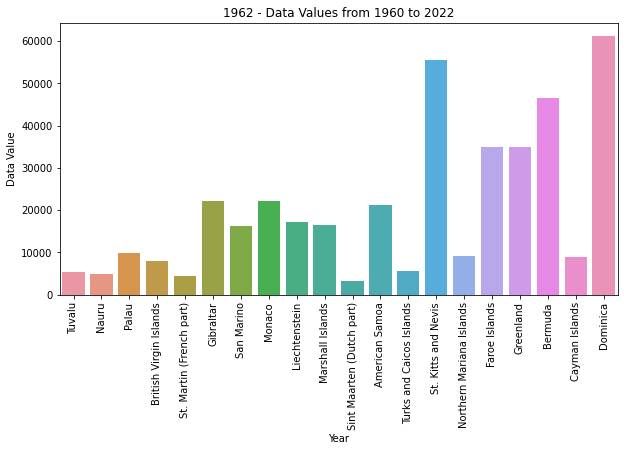

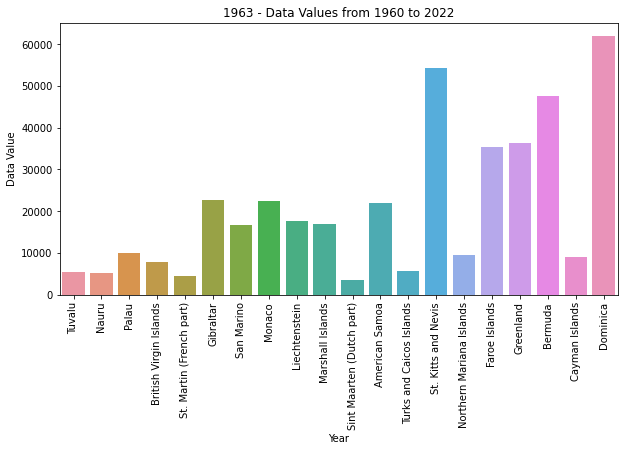

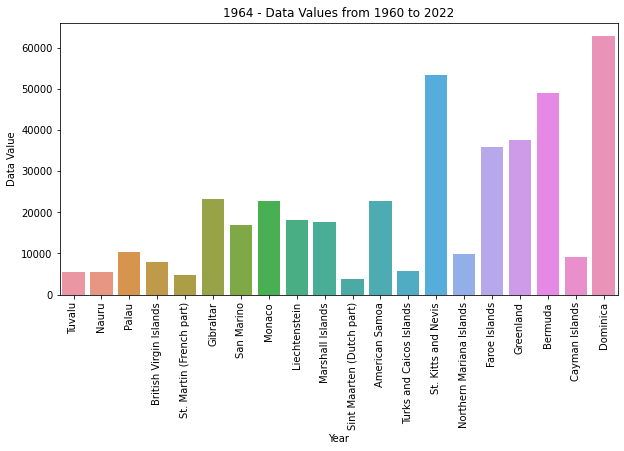

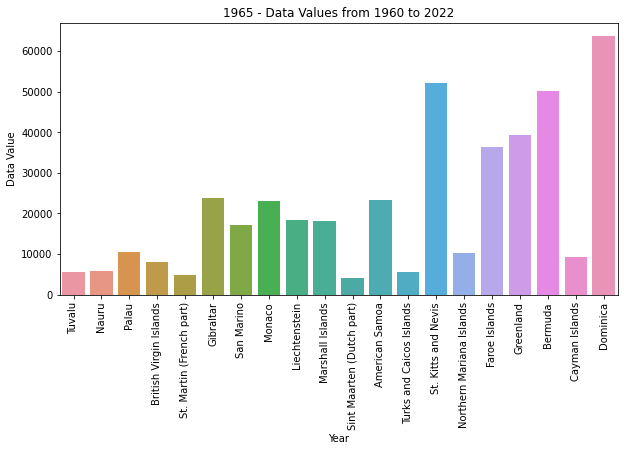

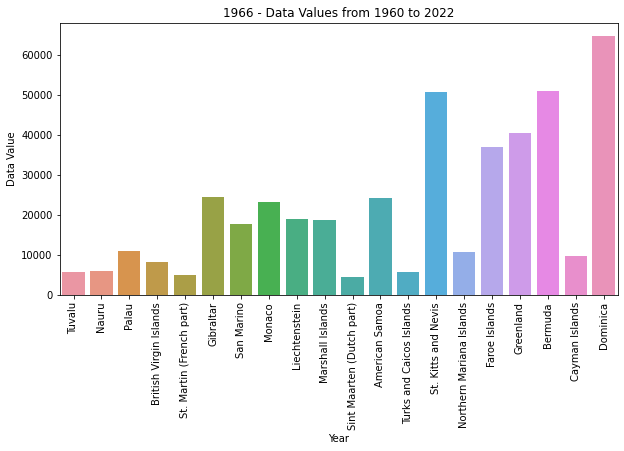

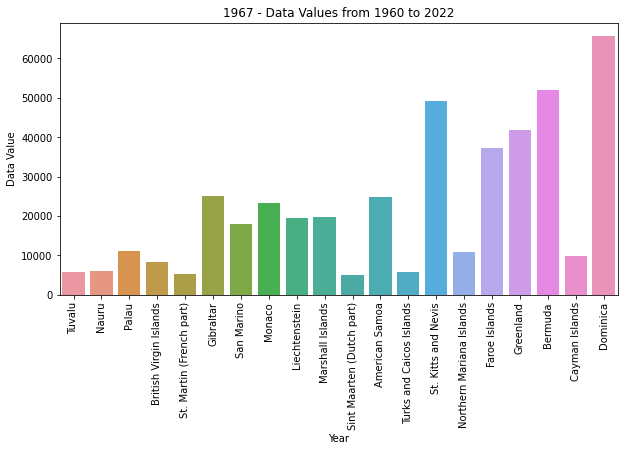

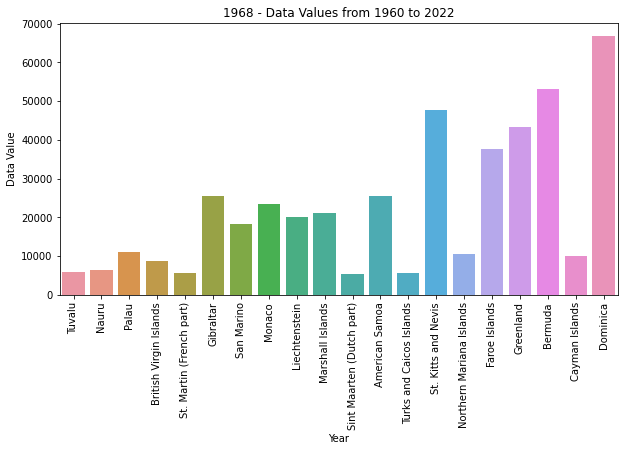

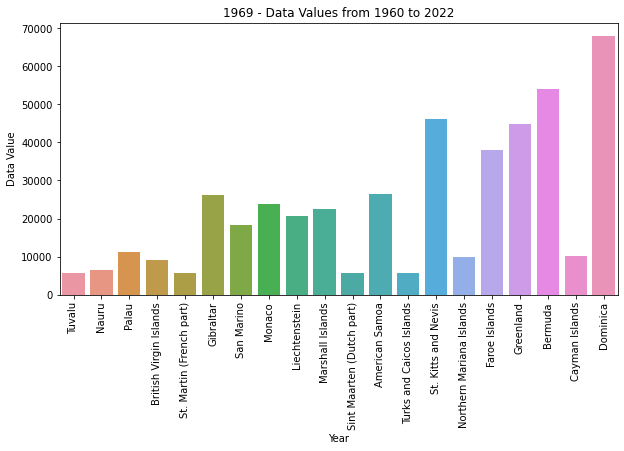

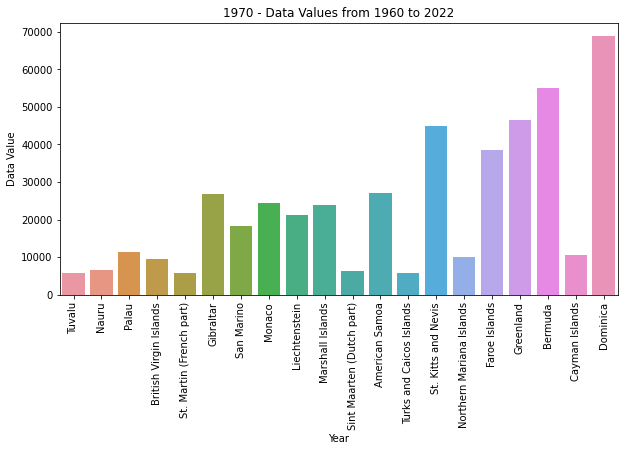

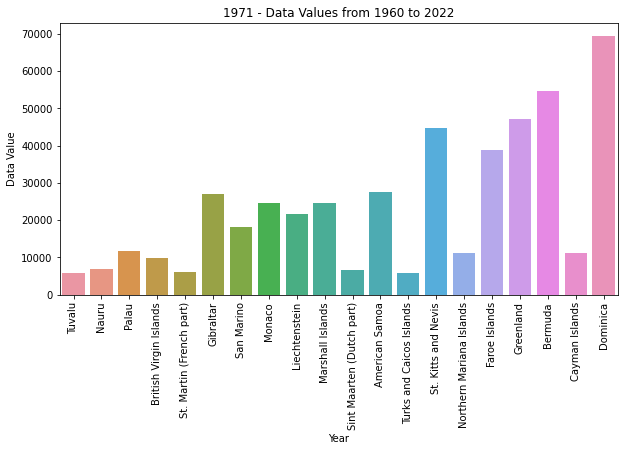

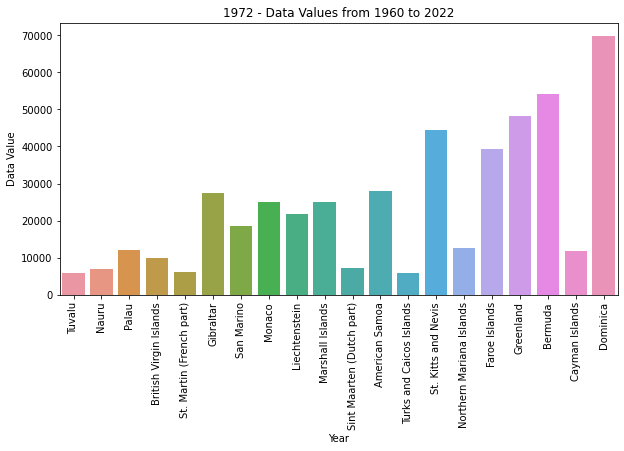

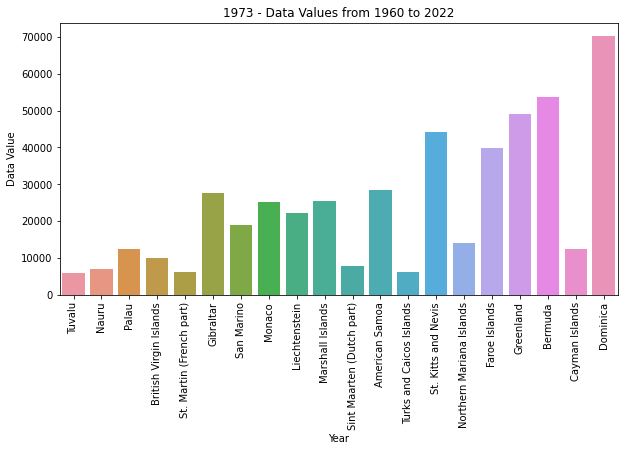

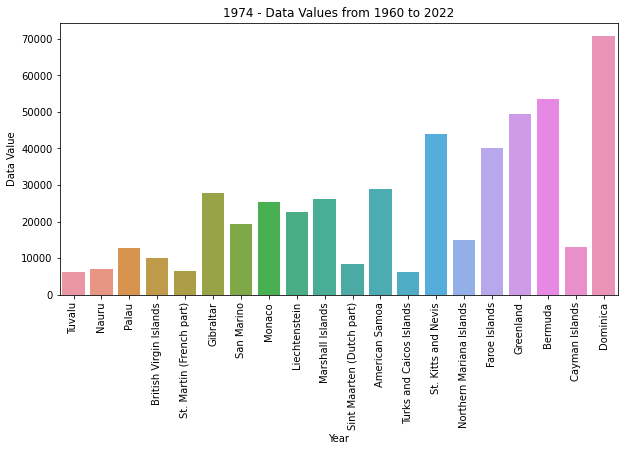

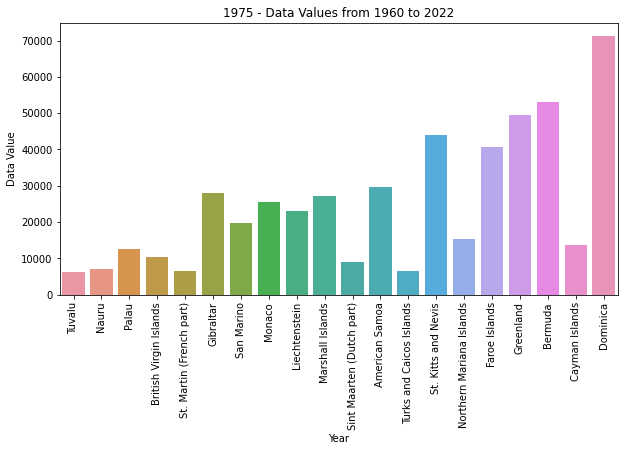

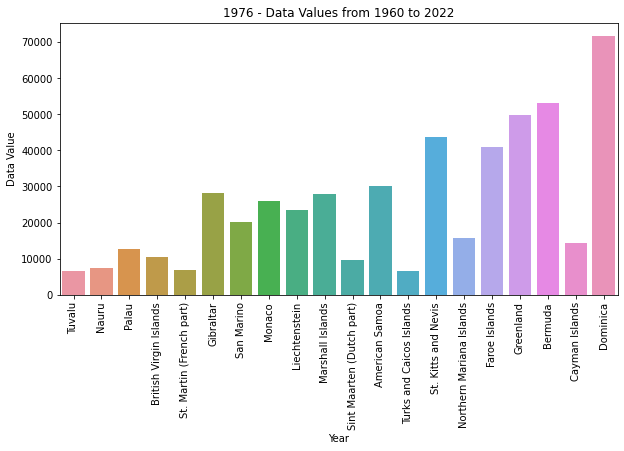

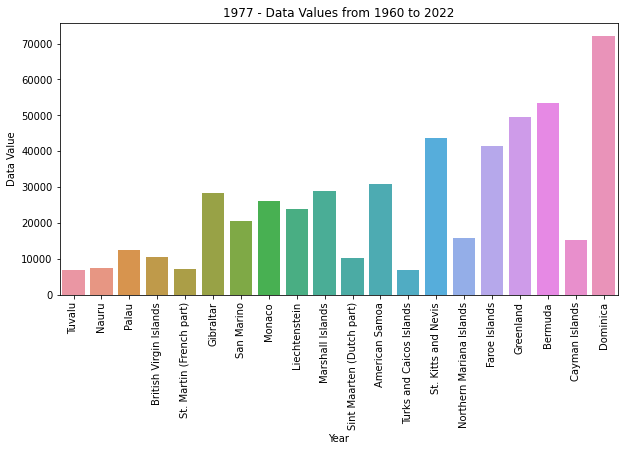

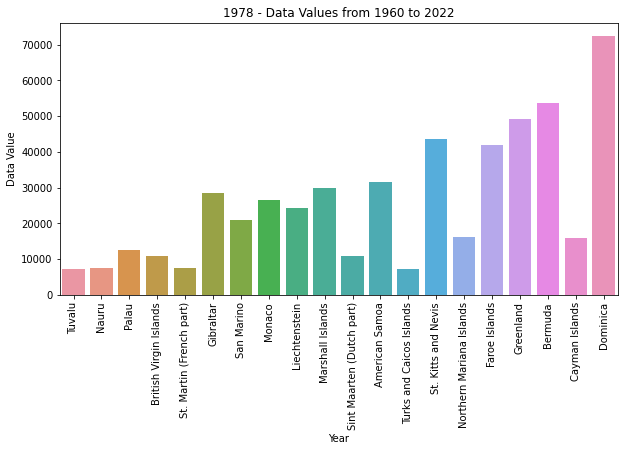

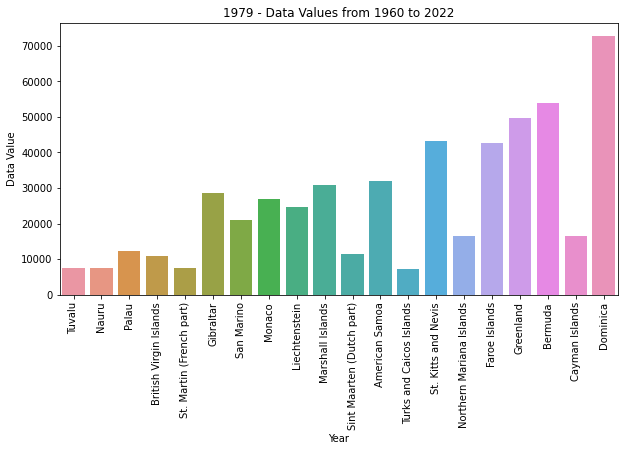

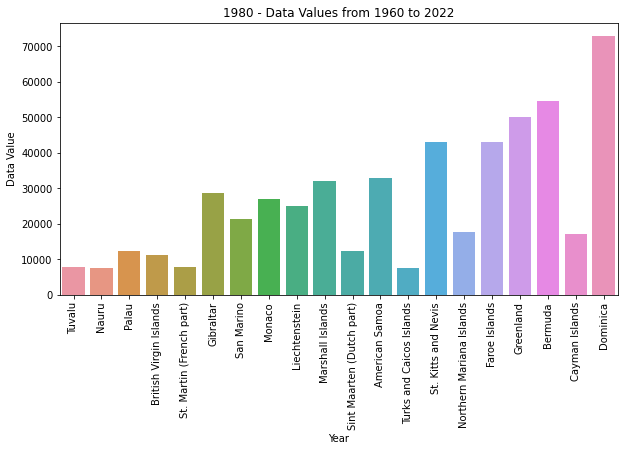

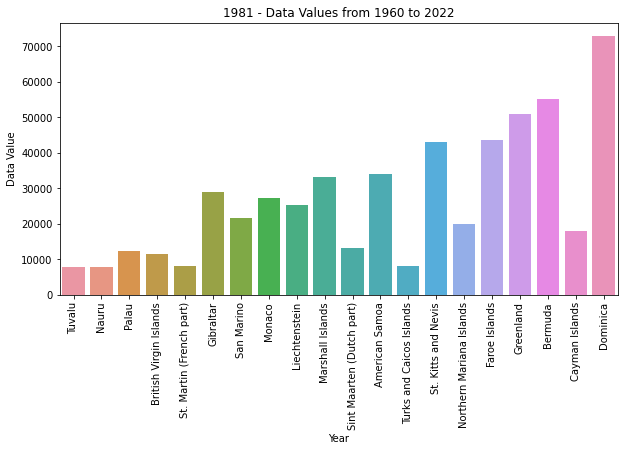

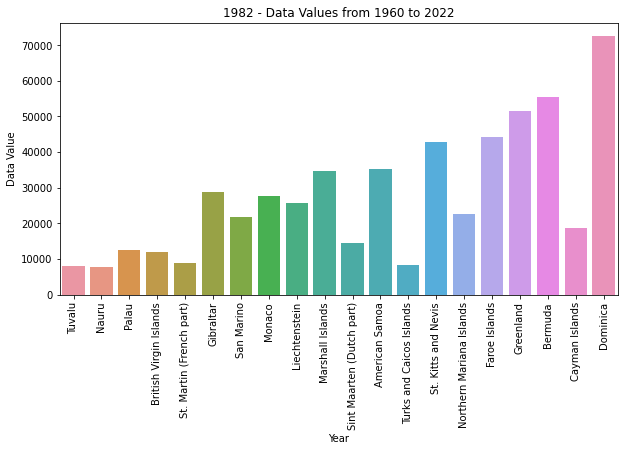

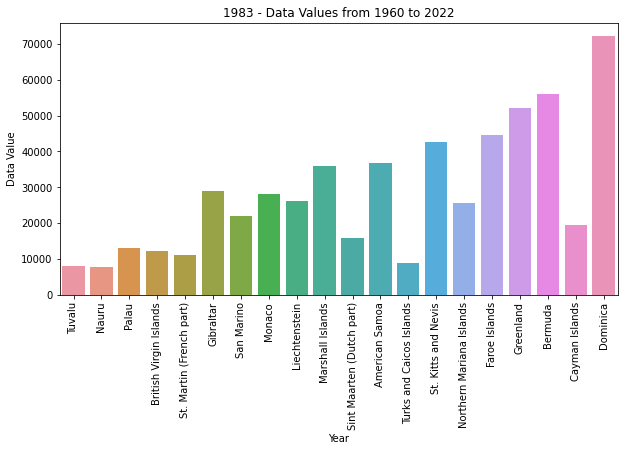

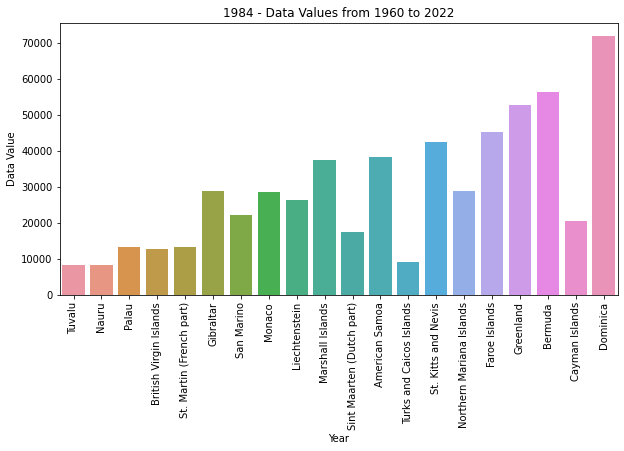

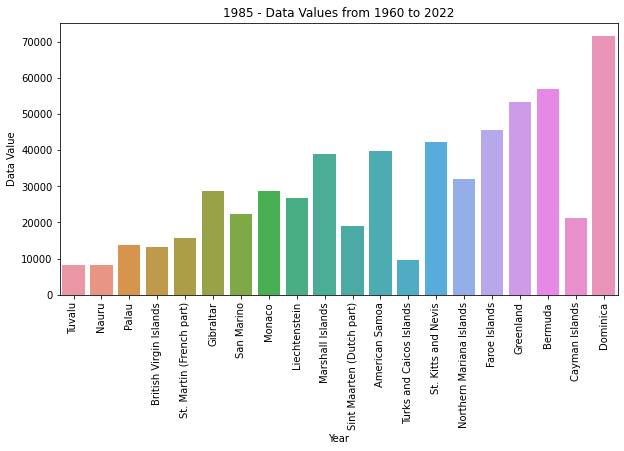

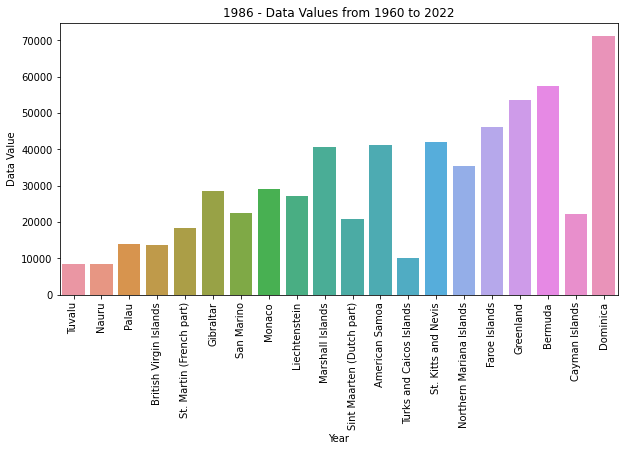

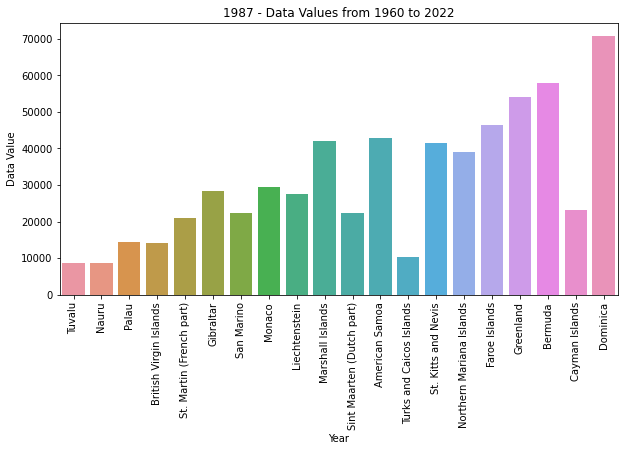

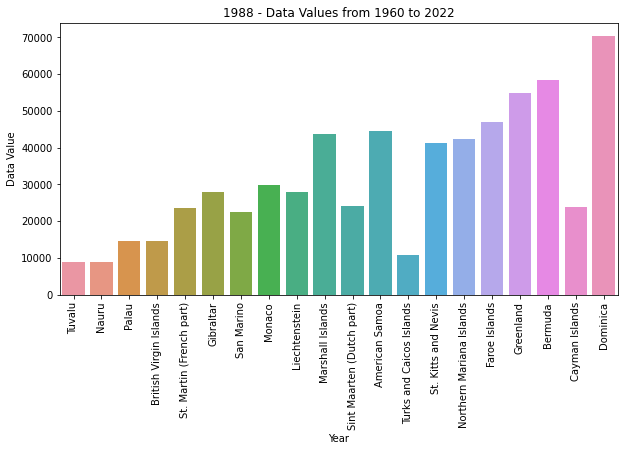

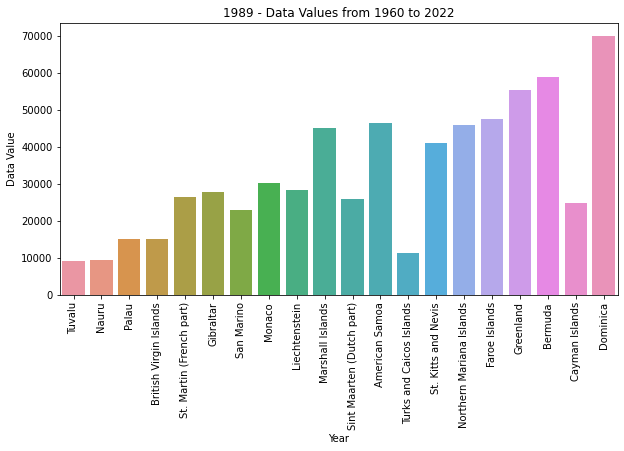

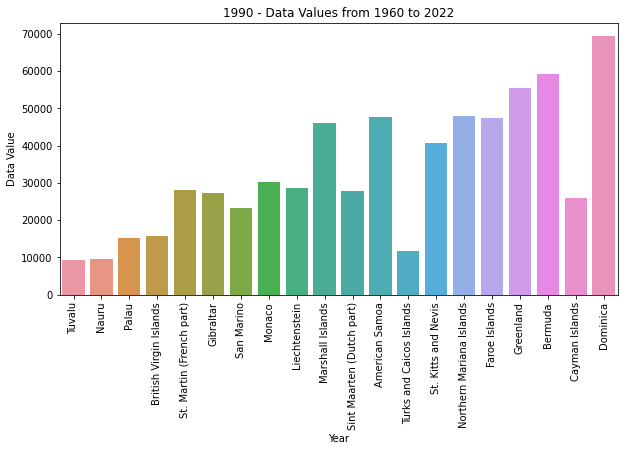

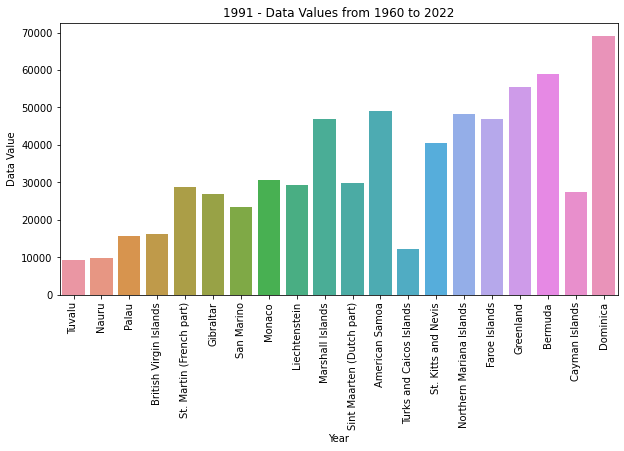

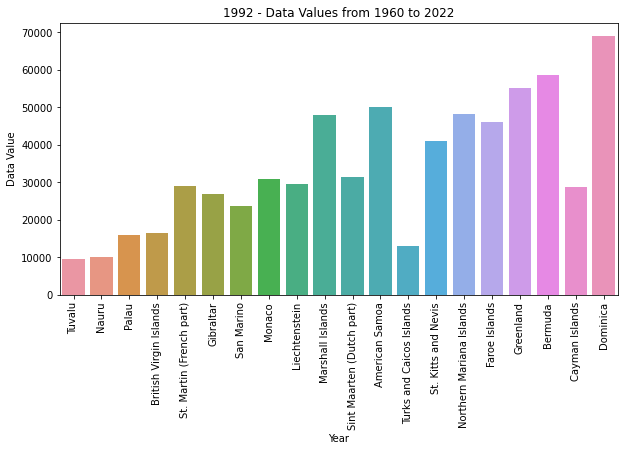

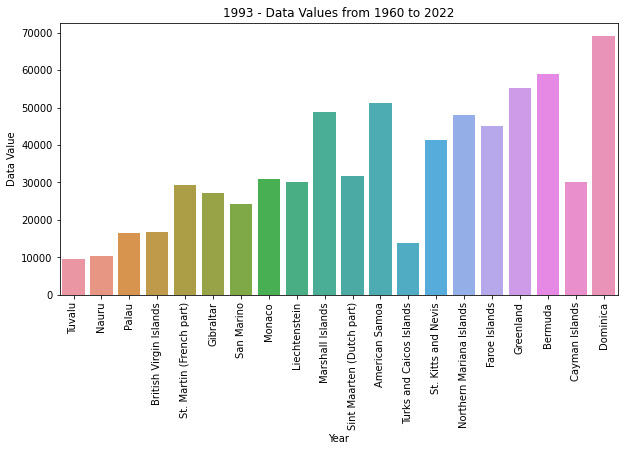

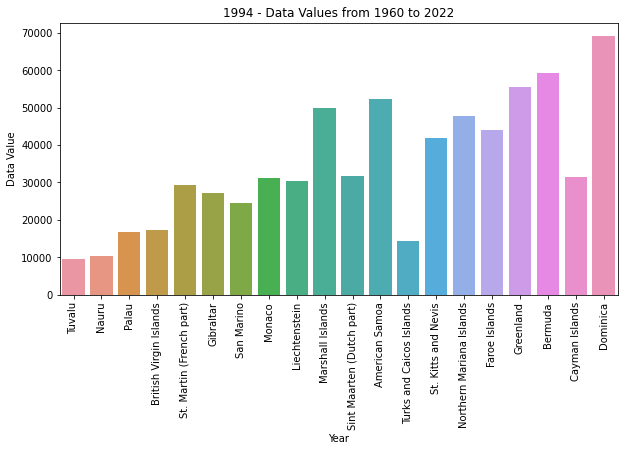

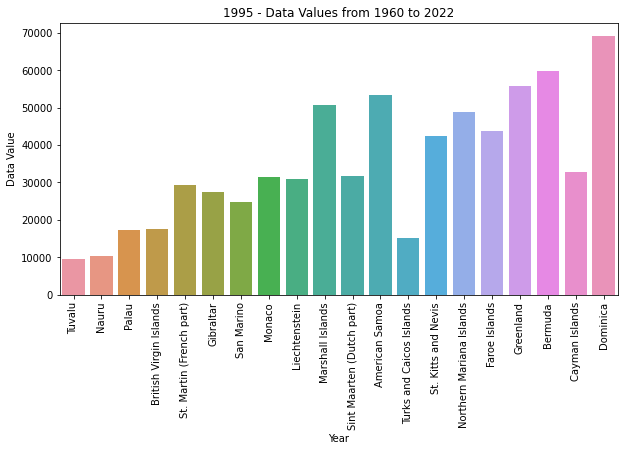

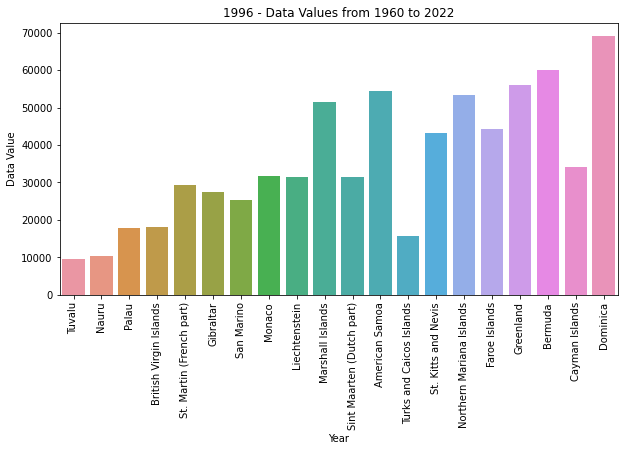

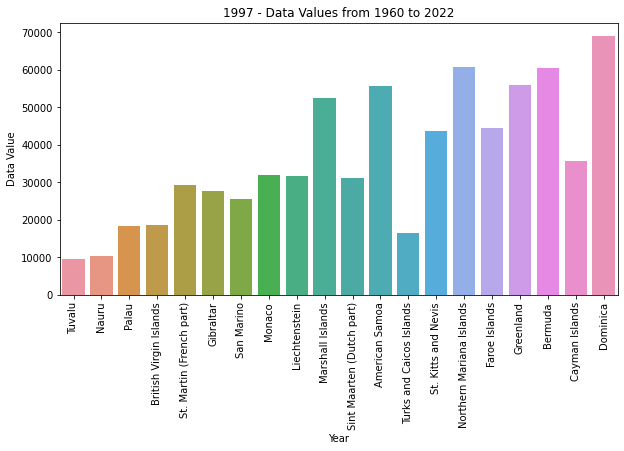

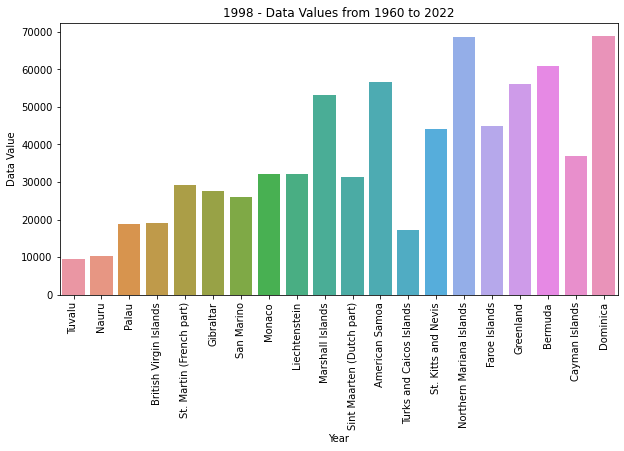

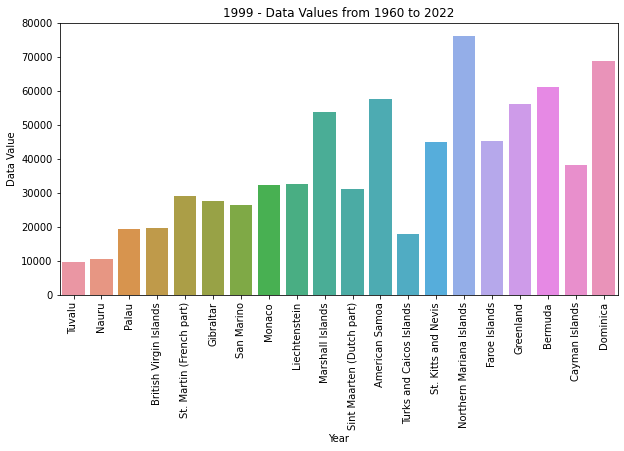

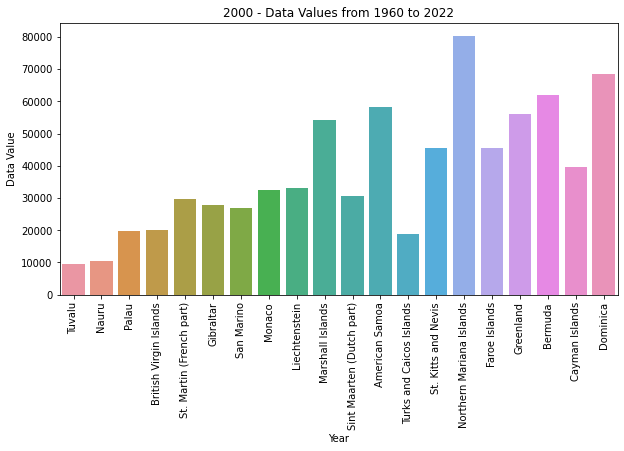

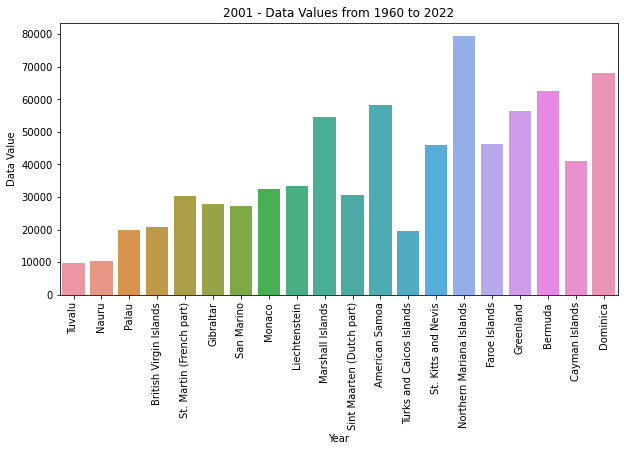

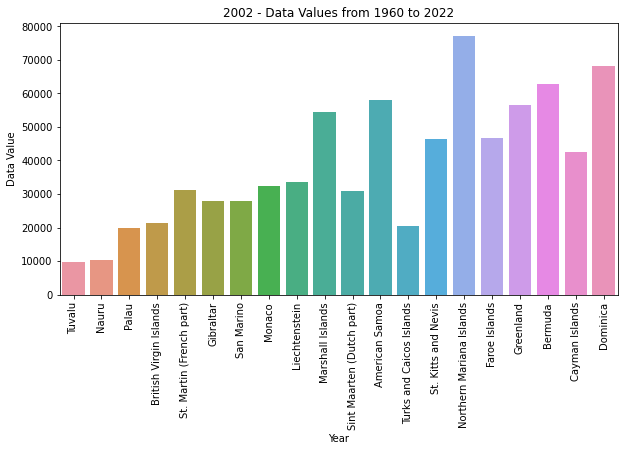

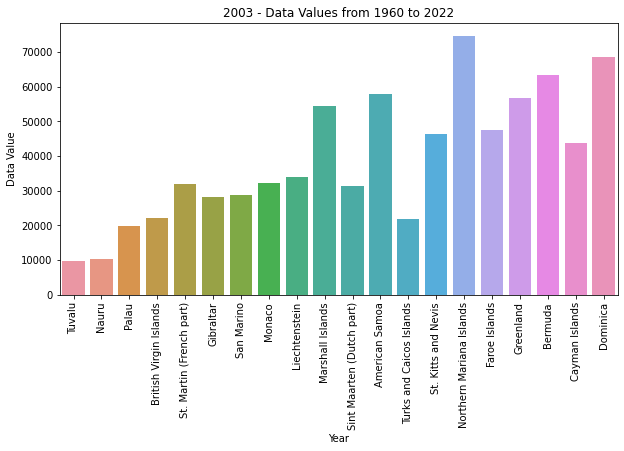

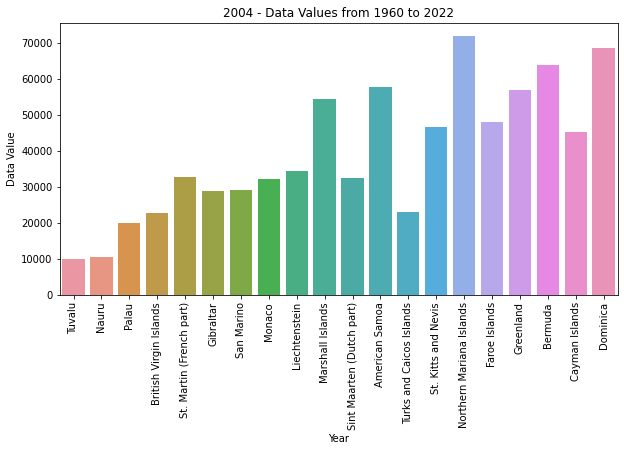

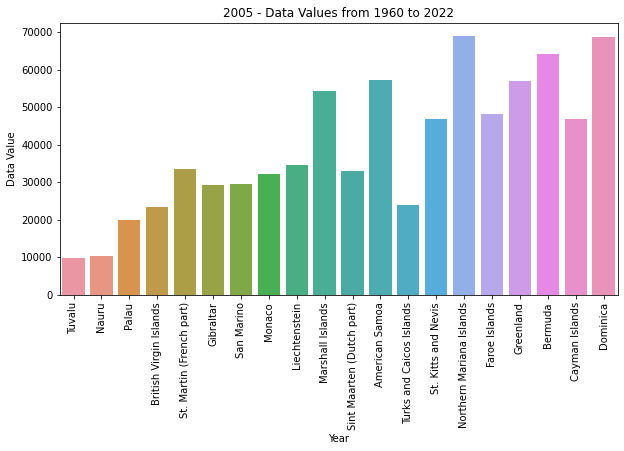

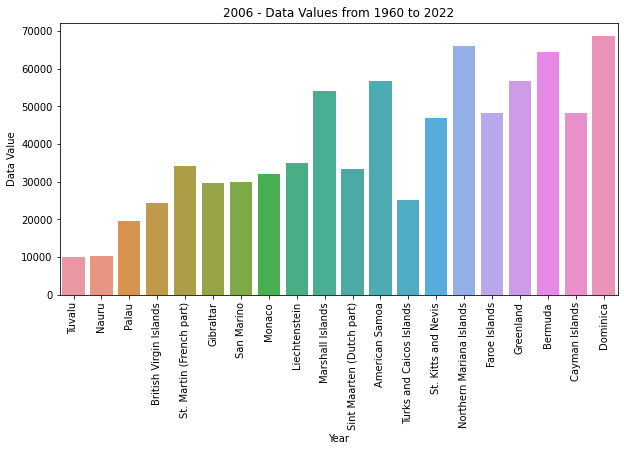

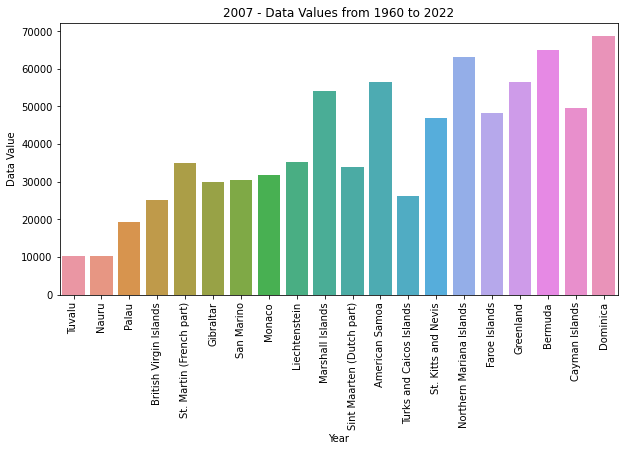

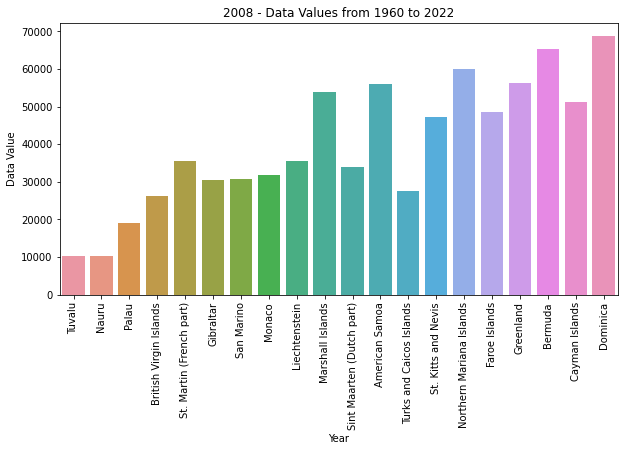

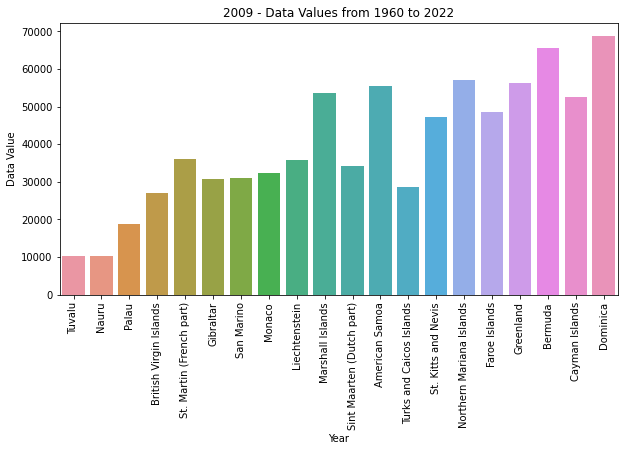

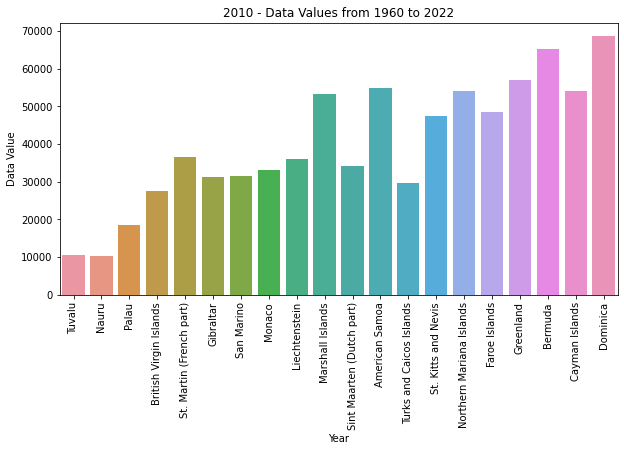

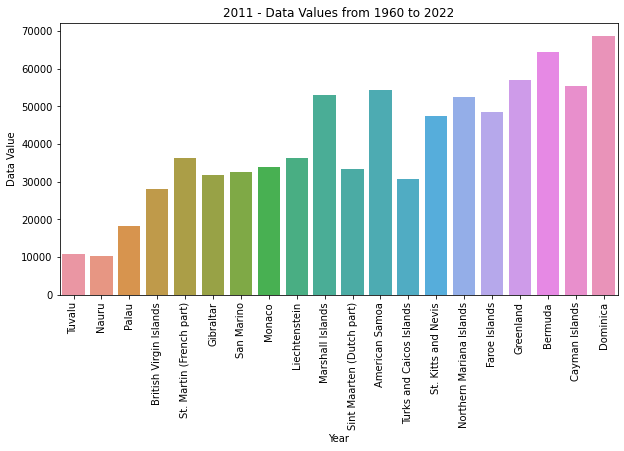

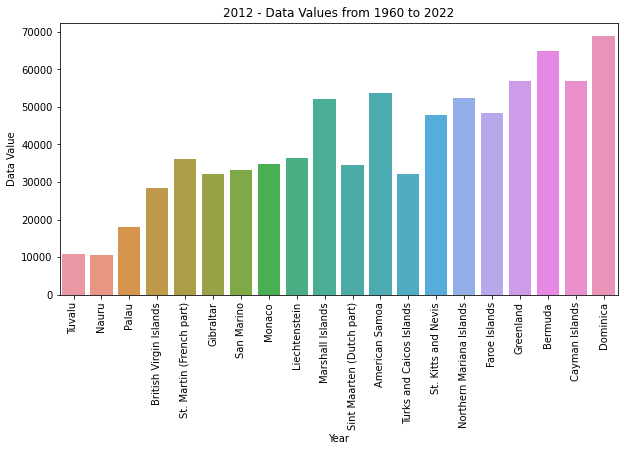

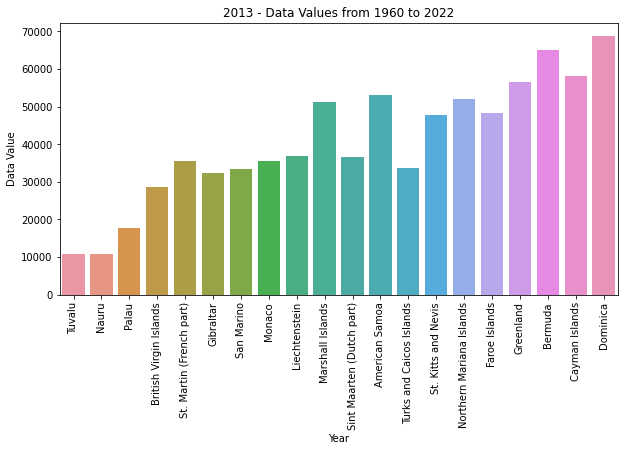

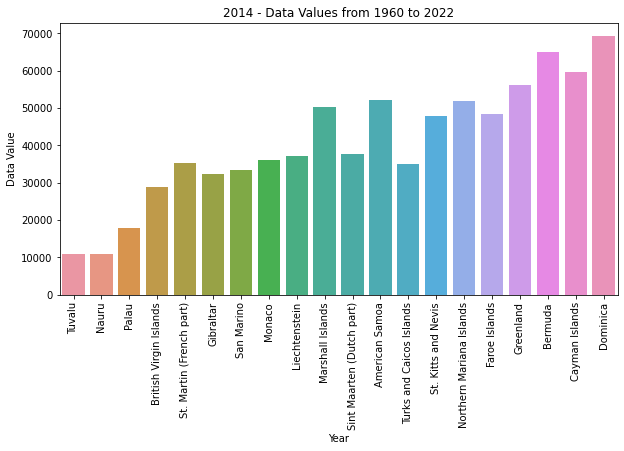

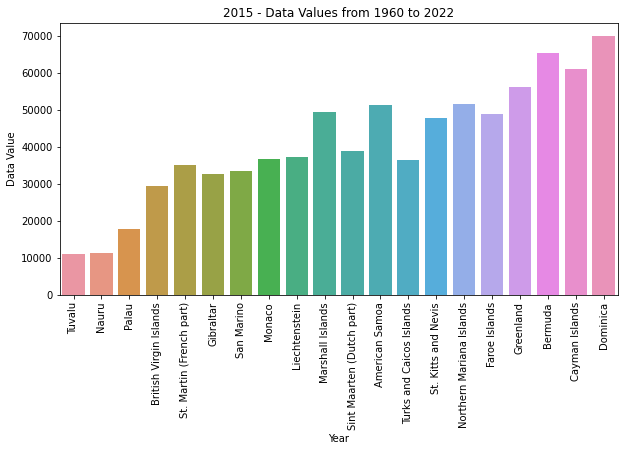

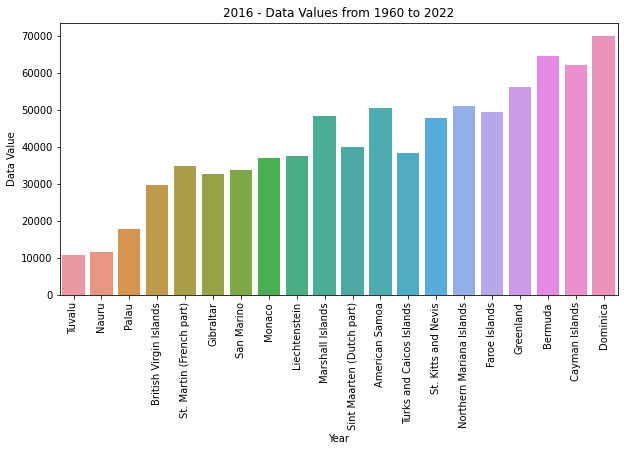

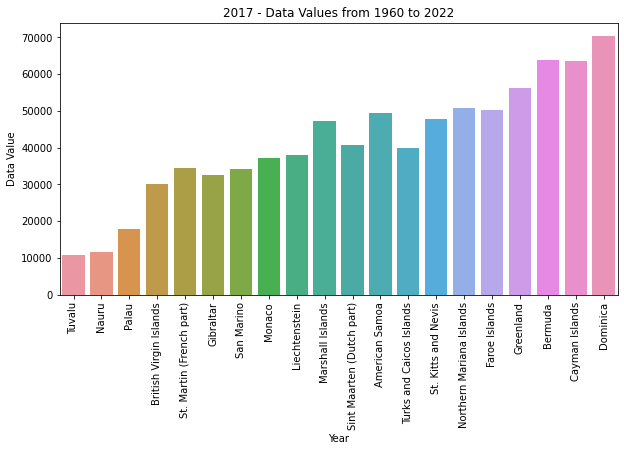

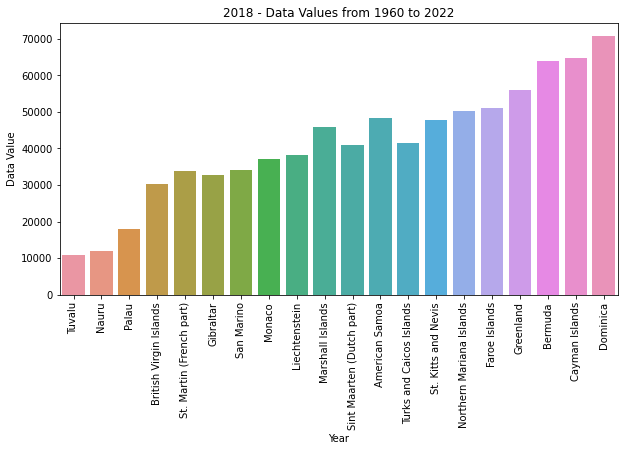

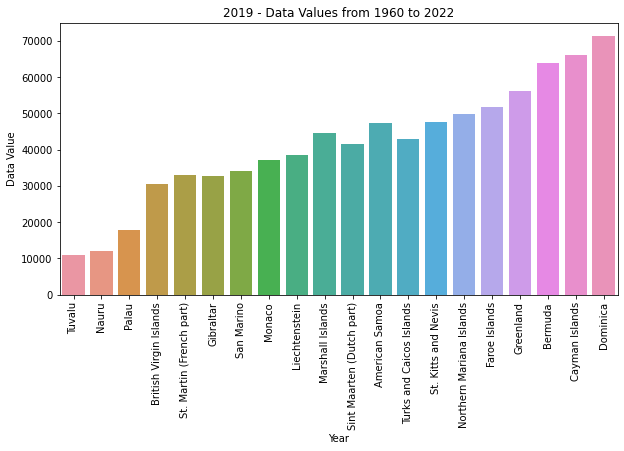

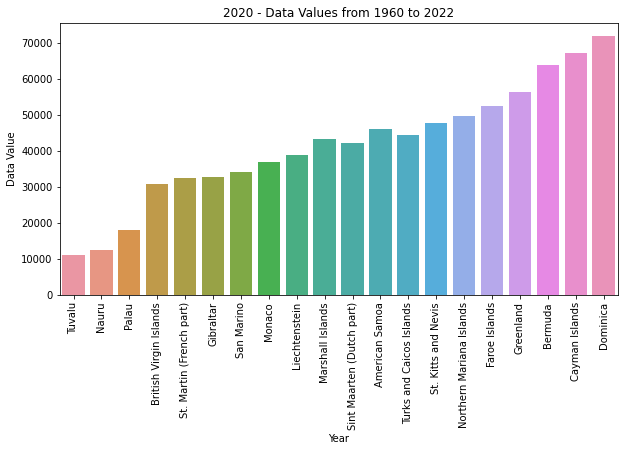

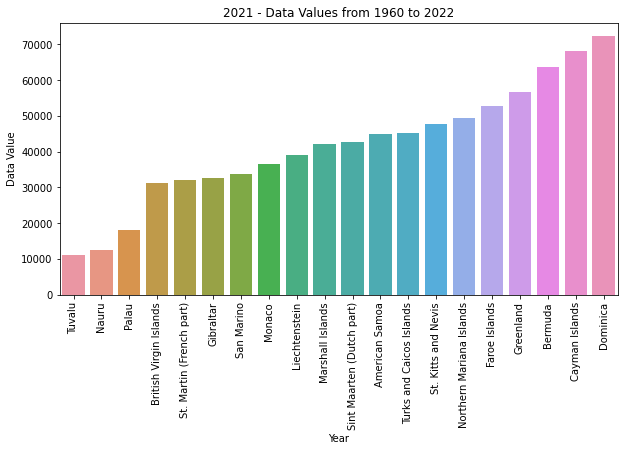

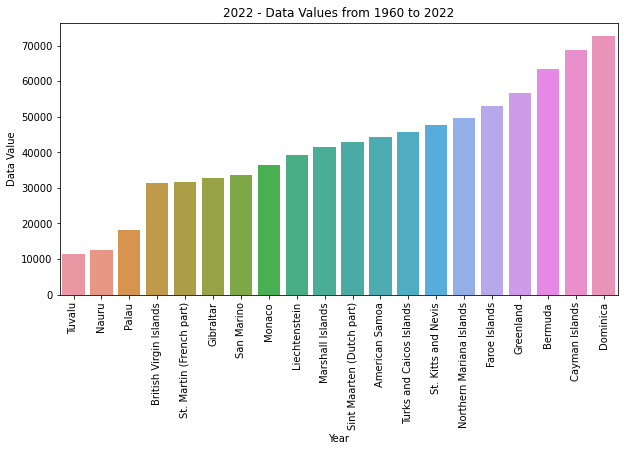

In [11]:
plot_country_data(country_by_1960)
plot_country_data(country_by_2022)

# Conclusion

The visualizations provide valuable insights into global population dynamics. Firstly, the data illustrates a consistent upward trend in global population from 1960 to 2022, with occasional fluctuations in growth rates. Secondly, examining the top 20 countries by population reveals notable shifts over time, highlighting changes in demographics and development patterns. These findings offer essential information for policymakers and planners, informing decisions across various sectors, from healthcare and education to infrastructure development and resource allocation. Understanding these trends is vital for addressing the challenges and opportunities associated with population growth on a global scale.